Rahma Alfina Salsabila

## Task 1: A Model for Diagnosing Cancer

#### 1.1 Introduction

In Australia, breast cancer is the second most diagnosed, based on the record in 2018 [1]. Using patterns and characteristics collected from medical datasets, machine-learning approaches have recently demonstrated promise in improving cancer detection.

We aim to build a machine learning model for determining whether a tumour is malignant or benign; we will perform feature importance analysis and PCA to develop an accurate and interpretable model for cancer diagnosis. The Breast Cancer Wisconsin dataset based on cell nucleus features is provided in this task. This dataset contains Patient ID Number, Diagnosis with M as Malignant and B as Benign, and Ten cell nucleus features which are mentioned below: 

- radius (mean of distances from the centre to points on the perimeter)
- texture (standard deviation of grayscale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (‘coastline approximation’ - 1).

The subsequent sections of this portfolio will be covered in several steps, methodology, results and discussions, and conclusions.

*[1] https://www.canceraustralia.gov.au/cancer-types/breast-cancer/statistics* 

### 1.2 Methodology

The methodology for this task involved several steps. First, perform data preparation by loading the dataset, handling missing values, splitting data into X and Y, and converting Y to a binary variable, with M=0 B=1 . The next step is Exploratory Data Analysis (EDA). Descriptive statistics were computed, and histograms and scatter plots were plotted to gain some insight into data and the relationship between data. Then, Two models are built (Logistic Regression and Decision Tree Model) with grid search cross-validation for hyperparameter tuning and are evaluated using metrics. The fourth step is to analyze the important features in the dataset for each model. Next, Principal Component Analysis is performed to obtain insights into the relationship between features and the target variables. This is then compared to the result of feature importance. In the final step, the new features from the PCA result are used to build a new model and compare the result with the original features.


#### 1.2.1 Data Preparation and Exploratory Data Analysis

In [1]:
#import module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
df_cancer = pd.read_csv('datasets/breast-cancer.csv')

In [3]:
#showing what is the inside of the data package
df_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [4]:
#Checking the NAN value of the data 
Nan_rows= df_cancer[df_cancer.isnull().any(axis=1)]
Nan_rows.head()

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean]
Index: []

In [5]:
#drop id column
df_cancer.drop('id', axis=1, inplace=True)

In [6]:
#convert the class to binary variable M=0 B=1 
df_cancer['diagnosis']=pd.factorize(df_cancer['diagnosis'])[0] 

In [7]:
#define x and y for breast cancer data 
x_cancer=df_cancer.iloc[:,1:]
y_cancer=df_cancer['diagnosis']

In [8]:
#define variable for descriptive statistic
x_cancer_desc_stats=x_cancer.describe()

#### 1.2.2 Building Two Models: Logistic regression and Decision Tree Models

In [9]:
#Importing the module
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
#defining a variable for scaler
scaler = StandardScaler()

#scalling the value for all features
x_cancer_scaled = scaler.fit_transform(x_cancer)

#import train_test_split data
from sklearn.model_selection import train_test_split

#splitting the data into train and test data
X_train11, X_test11, y_train11, y_test11 = train_test_split(x_cancer_scaled, y_cancer, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Tune hyperparameters for logistic regression (C)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
logistic_regression = LogisticRegression()
logistic_regression_cv = GridSearchCV(logistic_regression, param_grid, cv=5)
logistic_regression_cv.fit(X_train11, y_train11)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [13]:
# Tune hyperparameters for decision tree (max_depth and min_samples_split)
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]}
decision_tree = DecisionTreeClassifier()
decision_tree_cv = GridSearchCV(decision_tree, param_grid, cv=5)
decision_tree_cv.fit(X_train11, y_train11)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10]})

In [14]:
# Logistic Regression with best estimator
logistic_regression_best = logistic_regression_cv.best_estimator_
print(logistic_regression_best)
y_pred_lr = logistic_regression_best.predict(X_test11)

LogisticRegression(C=1)


In [15]:
# Decision Tree
decision_tree_best = decision_tree_cv.best_estimator_
print(decision_tree_best)
y_pred_dt = decision_tree_best.predict(X_test11)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)


In [16]:
#confusion matrices and performance metrics module
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn

#### 1.2.3 Feature Importance of each model

In [17]:
feature_names = x_cancer.columns
feature_importance_lr = abs(logistic_regression_best.coef_[0])
lr_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient_LR': feature_importance_lr})
feature_importance_dt = decision_tree_best.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance_DT': feature_importance_dt})
combined_importance_df = lr_importance_df.merge(dt_importance_df, on='Feature')

#### 1.2.4 Principal Component Analysis

In [18]:
from sklearn.decomposition import PCA


# Convert y_cancer to a NumPy array
y_cancer_array = np.array(y_cancer)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_cancer_scaled)

# Proportion of Variance Explained
variance_explained = pca.explained_variance_ratio_
proportion_variance_explained = sum(variance_explained)

print("Proportion of Variance Explained by First Two Principal Components: {:.2f}".format(proportion_variance_explained))

Proportion of Variance Explained by First Two Principal Components: 0.80


#### 1.2.5 Build a New Model based on The New Features in PCA Result 

In [19]:
# PCA to determine the number of components for 95% explained variance
pca_new= PCA(n_components=0.95)
principal_components2 = pca_new.fit_transform(x_cancer_scaled)

# Number of components to retain 95% explained variance
num_components2 = pca_new.n_components_
print("Number of components to retain 95% explained variance:", num_components2)

# Create new dataset using principal components as features
new_dataset = pd.DataFrame(data=principal_components2, columns=[f"PC{i+1}" for i in range(num_components2)])

# Split the new dataset into train and test sets
X_train12, X_test12, y_train12, y_test12 = train_test_split(new_dataset, y_cancer, test_size=0.2, random_state=42)

# Choose one of the model: Decision Tree)
model1 = DecisionTreeClassifier(max_depth=3, min_samples_split=10)

# Train the model on the new features
model1.fit(X_train12, y_train12)

# Predict on the test set
y_pred_nf = model1.predict(X_test12)

# Evaluate the performance
report_nf = classification_report(y_test12, y_pred_nf)
print("performance report:", report_nf)
print("Dimension of the new (projected) dataset:", new_dataset.shape[1])


Number of components to retain 95% explained variance: 5
performance report:               precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Dimension of the new (projected) dataset: 5


### 1.3 Result and Discussion

#### 1.3.1 Data Preparation and Exploratory Data Analysis 

In [20]:
x_cancer_desc_stats

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  
count     569.000000              569.000000  
mean        0.181162                0.062798  
std         0.027414                0.007060  
min         0.106000                0.049960  
25%         0.161900                0.057700  
50%         0.179200                0.061540  
75%         0.195700                0.066120  
max         0.304000                0.097440

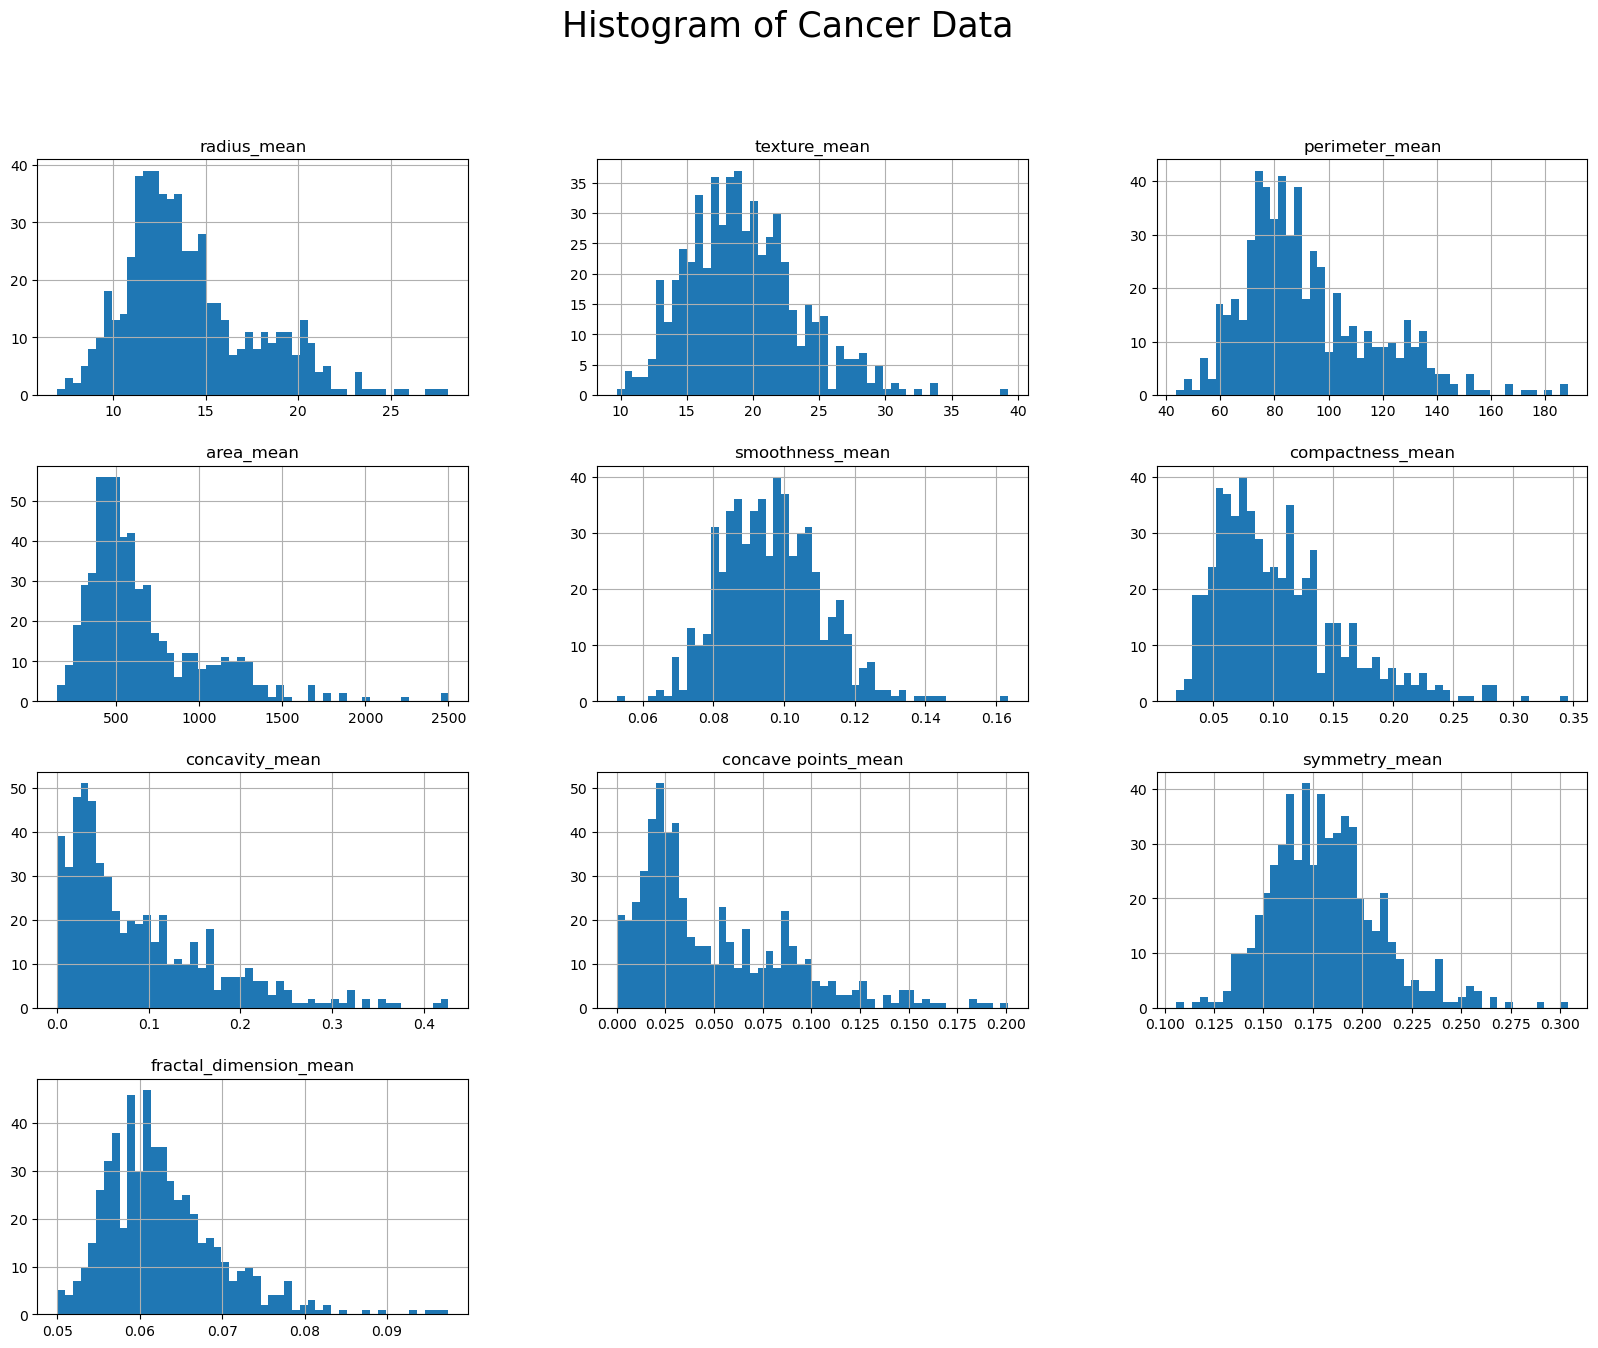

In [21]:
#define for plot the histogram of the data
x_cancer.hist(bins=50,figsize=(20,15))

# Add a title to the histogram
plt.suptitle("Histogram of Cancer Data", fontsize=25)
# Adjust spacing between subplots
plt.show()

In [22]:
import seaborn as sn

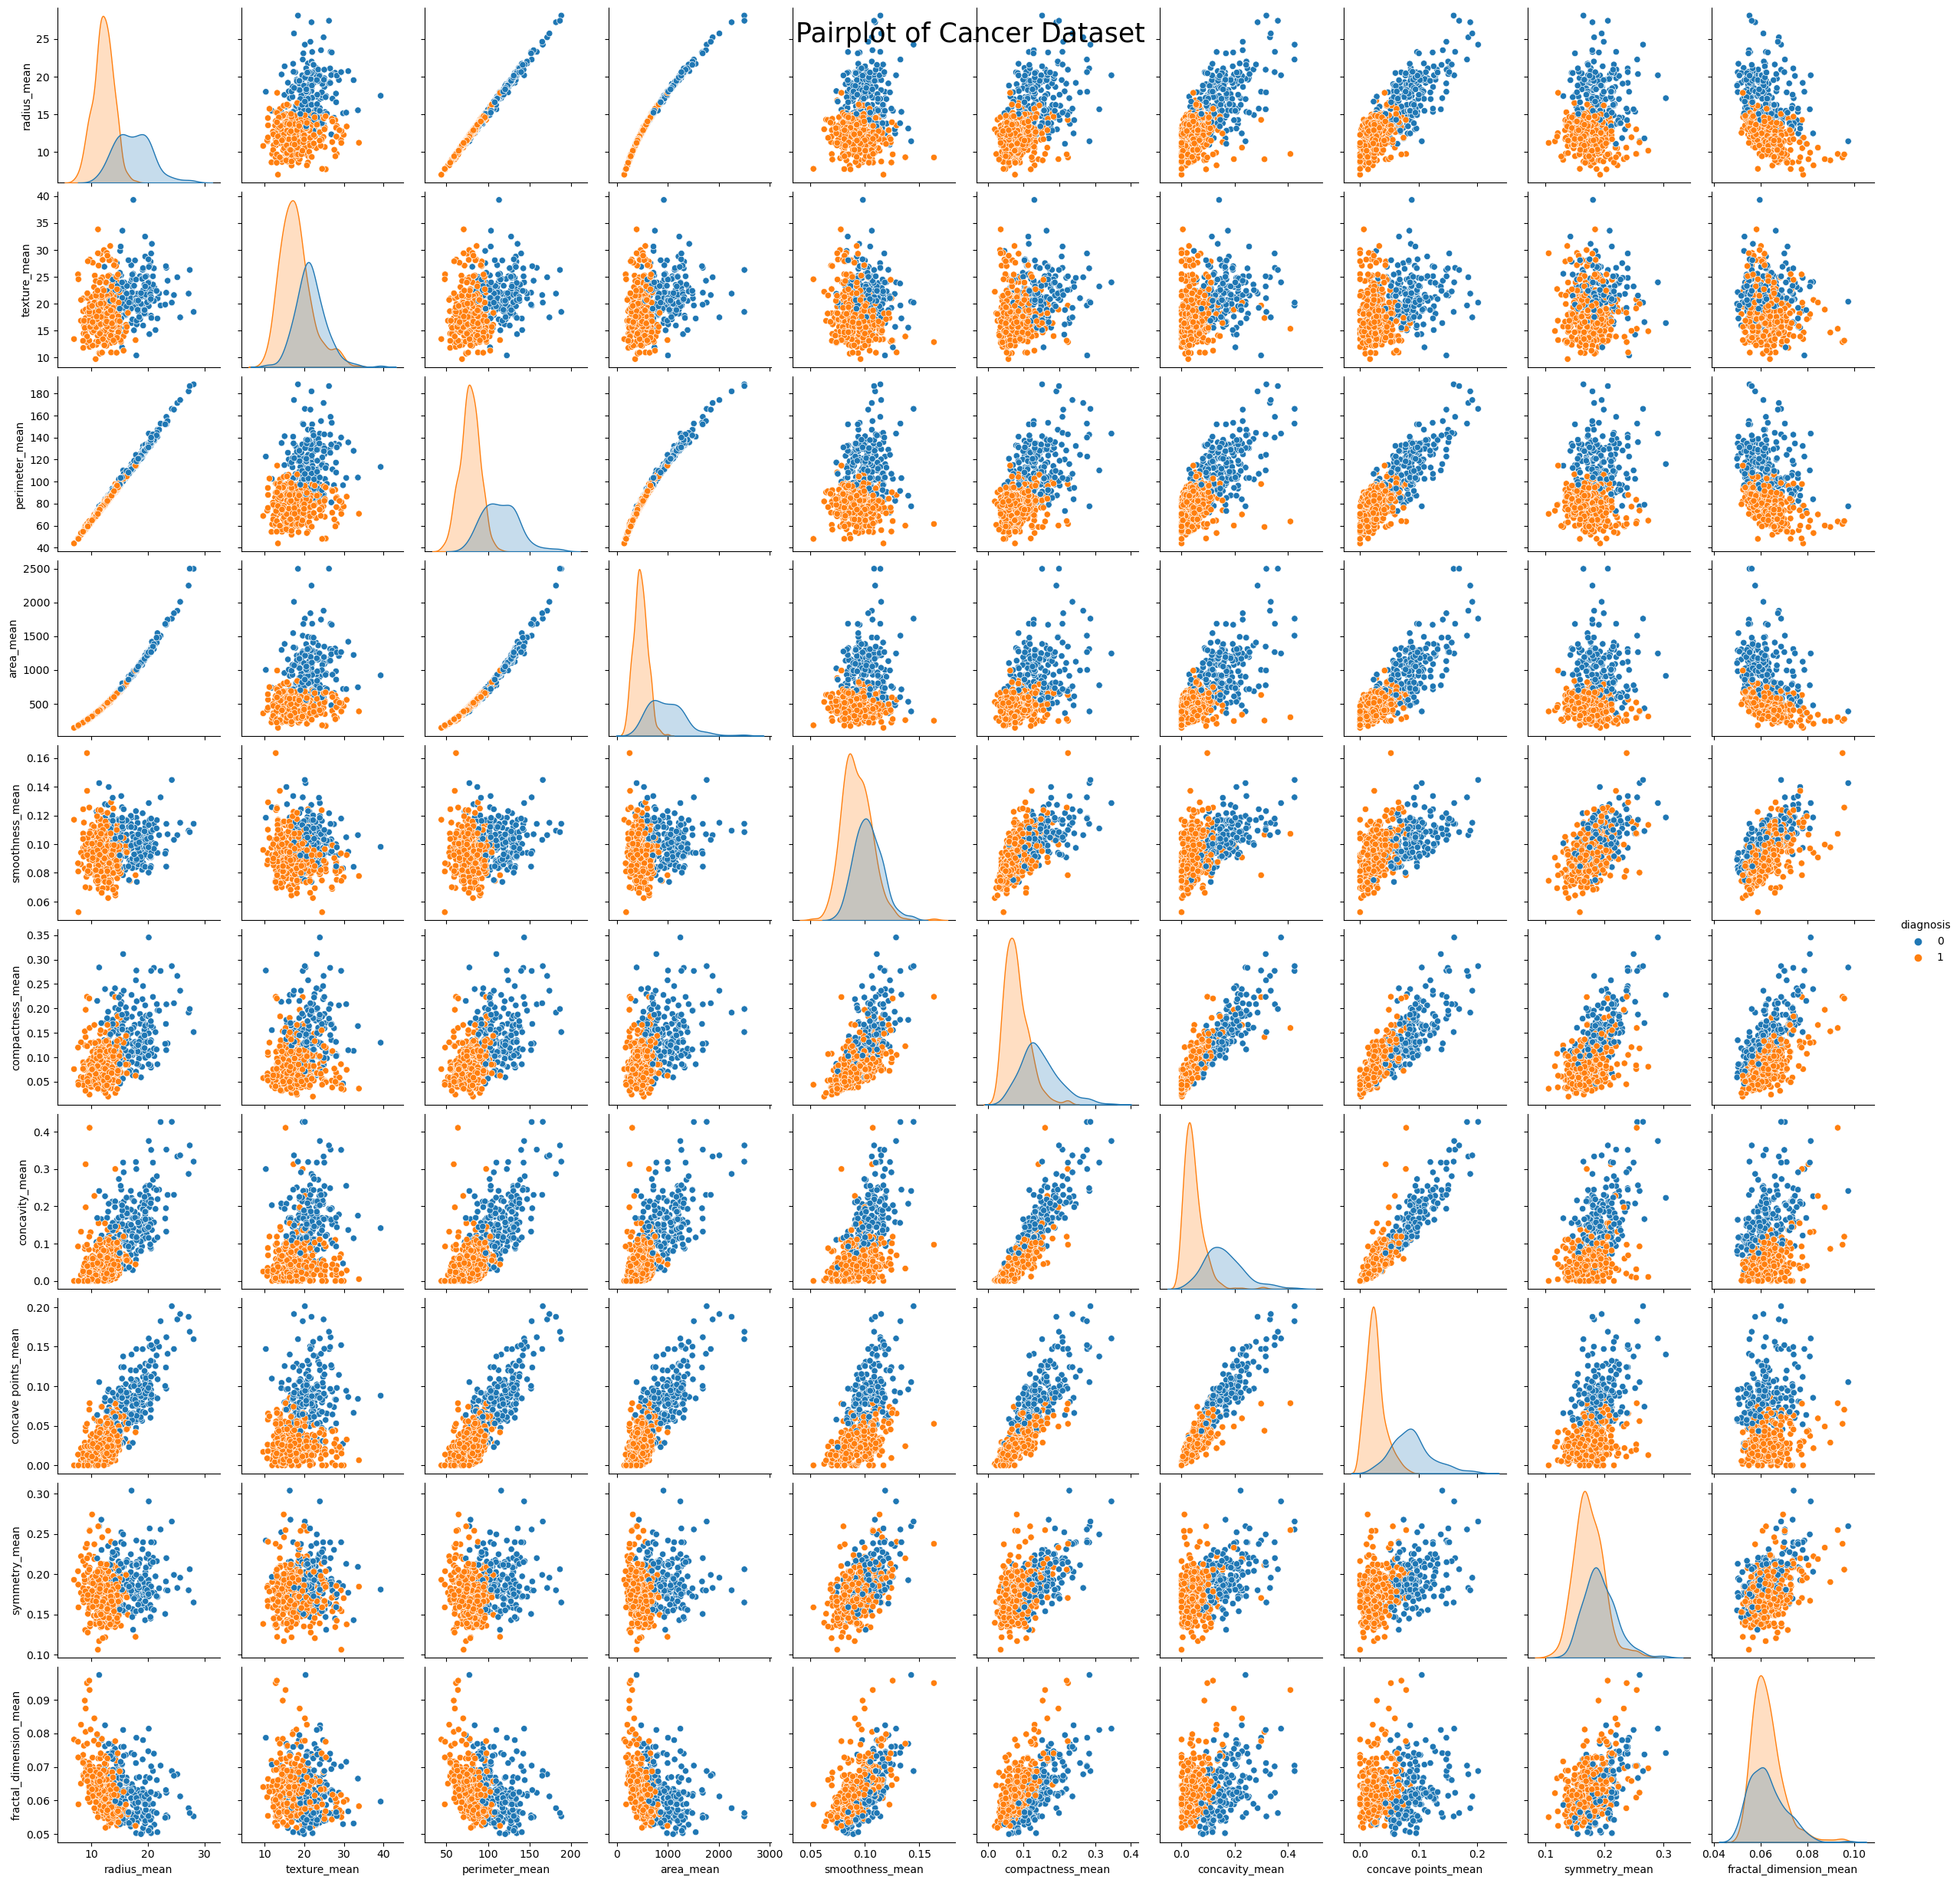

In [23]:

sn.pairplot(df_cancer, hue='diagnosis')

# Add a title to the pairplot
plt.suptitle("Pairplot of Cancer Dataset", fontsize=25)
  
# Show the pairplot
plt.show()

There are ten columns of breast cancer data features; we then check the NaN value in the data. This step is essential because NaN values can cause errors, many statistical and machine learning algorithms cannot handle missing data, and they can also affect the models' performance.

From descriptive statistics, the range of the feature's mean values, from around 0.048 to 654.89, illustrates several measurements' various scales and magnitudes. The standard deviations of the characteristics are between 0.007 and 351.91, roughly showing the degree of variability or dispersion within each feature. Minimum values for the features vary from 0 to 143.5, while maximum values range from 0.2012 to 2501. The ranges for the features are varied. These ranges visually represent the variety and range of values found in the dataset. 
If the features have different scales or units, it is generally recommended to scale them before fitting the model. Scaling the features helps to prevent the model from assigning disproportionately high importance to features with larger scales. Standardizing the features to have zero mean and unit variance (using techniques like StandardScaler) is a common approach.

From the plotted histogram, we can see that most of the data is concentrated on the left side of the distribution, and there is a long tail to the right, called right-skewed data. There are several reasons why data might be right-skewed. One common reason is the presence of outliers or extreme values on the right side of the distribution, as we can see in the descriptive stats that there is a maximum value that is really far from the median. Another reason for right-skewed data is that the variable might have a natural lower bound but no upper bound. This also can be overcome by scaling the data.

In the pair plot, we can see that some variables have a high correlation that can be seen for the strong linear relationship, such as radius_mean, perimeter_mean, and area mean. Meanwhile, some other features have a low correlation that can be detected with more dispersed data points, such as radius_mean vs texture_mean and smothness_mean vs perimeter_mean, meaning the variables are independent or weakly related. We will include this for the last step of the feature selection for the new final model.

#### 1.3.2 Comparison of two models

We built two models, Logistic Regression and Decision Tree, for distinguishing breast cancer diagnosis based on its features. We applied Grid Search Cross Validation to search each model's best Hyperparameter. The best Hyperparameter tuning for Logistic Regression is C=1. Meanwhile, for Decision Tree Classifier is max_depth=3, min_samples_split=10. Below is the confusion matrix and classification report for each model.

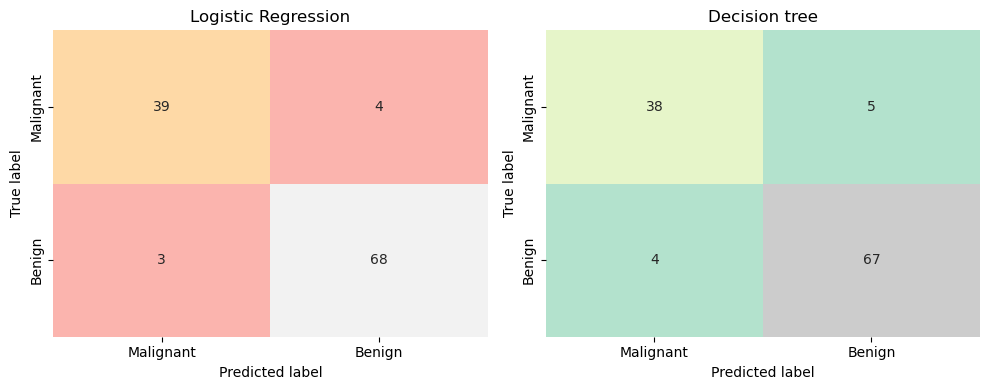

In [24]:
# Define the labels for the confusion matrix
labels = ['Malignant','Benign']

# Compute the confusion matrix for logistic regression
cm_lr = confusion_matrix(y_test11, y_pred_lr)

# Compute the confusion matrix for decision tree
cm_dt = confusion_matrix(y_test11, y_pred_dt)

# Create a figure with two subplots
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# Plot the confusion matrix for the training data
sn.heatmap(cm_lr, ax=ax[0], annot=True, fmt='.0f', cmap='Pastel1', cbar=False, xticklabels=labels, yticklabels=labels)
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('Logistic Regression')

# Plot the confusion matrix for the test data
sn.heatmap(cm_dt, ax=ax[1], annot=True, fmt='.0f', cmap='Pastel2', cbar=False, xticklabels=labels, yticklabels=labels)
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('Decision tree')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


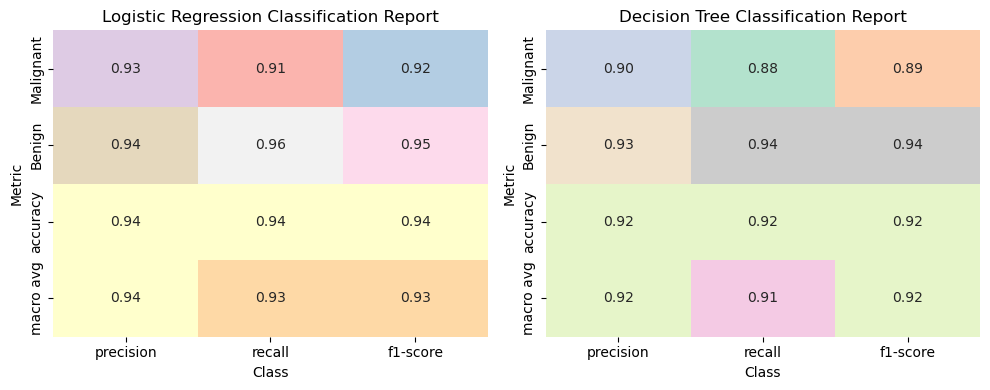

In [25]:
# Define the labels for the classification report
labels = ['Malignant','Benign']

# Generate the classification report for the first model
report1 = classification_report(y_test11, y_pred_lr, target_names=labels, output_dict=True)
df_report1 = pd.DataFrame(report1).transpose()

# Generate the classification report for the second model
report2 = classification_report(y_test11, y_pred_dt, target_names=labels, output_dict=True)
df_report2 = pd.DataFrame(report2).transpose()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the classification report for the first model
sn.heatmap(df_report1.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Pastel1', cbar=False, ax=axes[0])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Metric')
axes[0].set_title('Logistic Regression Classification Report')

# Plot the classification report for the second model
sn.heatmap(df_report2.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Pastel2', cbar=False, ax=axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Metric')
axes[1].set_title('Decision Tree Classification Report')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

We use this calculation to evaluate the model:

Precision: The ratio of accurate positive predictions to all of the model's positive predictions is known as precision. It assesses how well the model recognizes the positive class. The model's low false positive rate is shown by high accuracy.

Recall (also known as sensitivity or the true positive rate): Recall is the proportion of true positive predictions to all of the dataset's real positive cases. The model's capacity to accurately detect the positive examples is measured. A high recall indicates a low false negative rate.

Accuracy: The ratio of the total number of accurate predictions (including both true positives and true negatives) to the total number of instances in the dataset is called accuracy. It evaluates how accurately the model's predictions are made in general. 

F1-score: The F1-score combines precision and recall into a single metric to assess a model's accuracy. It verifies the model's performance and is the harmonic mean of accuracy and recall. The F1-score is between 0 and 1, where 1 represents flawless recall and accuracy.

For Logistic Regression, In the confusion matrix, we can see that it predicted four false labels for Malignant and three false predictions for Benign. Meanwhile, Decision Tree Classifier performs slightly better, which wrongly predicted 3 and 2 for Malignant and Benign, respectively. In terms of accuracy, the Decision tree has a slightly higher accuracy than Logistic Regression which is 94%, 2% higher than the logistic regression. It is also applied for other calculation metrics, Precision, Recall, and F1-Score. Decision Tree outperforms Logistic Regression with 0.94, 0.93, 0.94 for each calculation, with a difference of 0.02 -- 0.03, since Decision Tree predicted fewer false positives and false negatives, which is what Accuracy, precision, Recall and F1-score used for calculation. Therefore, we will use Decision Tree Classifier for the next new model.

#### 1.3.3 Analyze Feature Importance and Coefficient

In [26]:
combined_importance_df

Feature  Coefficient_LR  Importance_DT
0             radius_mean        0.939986       0.016540
1            texture_mean        1.356535       0.074323
2          perimeter_mean        0.850884       0.028169
3               area_mean        1.146472       0.043595
4         smoothness_mean        0.999043       0.005024
5        compactness_mean        0.547468       0.012248
6          concavity_mean        0.943495       0.033293
7     concave points_mean        1.749911       0.773481
8           symmetry_mean        0.439203       0.013326
9  fractal_dimension_mean        0.298966       0.000000

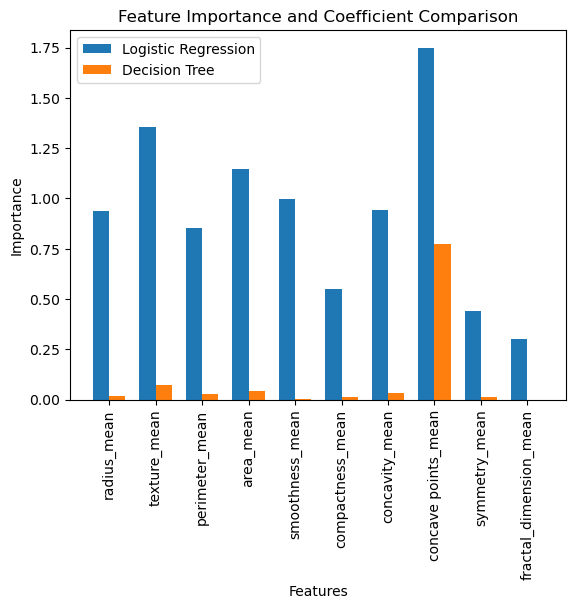

In [27]:
# Set the positions of the bars on the x-axis
x = np.arange(len(feature_names))

# Set the width of the bars
width = 0.35

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the bars for logistic regression
ax.bar(x - width/2, feature_importance_lr, width, label='Logistic Regression')

# Plot the bars for decision tree
ax.bar(x + width/2, feature_importance_dt, width, label='Decision Tree')

# Set the labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance and Coefficient Comparison')
ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=90)
ax.legend()

# Show the plot
plt.show()

The interpretation of feature importances may vary depending on the dataset and models used. Different Model Structures: Logistic regression is a linear model that assumes a linear relationship between the features and the target variable. It calculates coefficients that represent the impact of each feature on the target. Logistic regression coefficients are sensitive to the scale of the features, while decision trees are invariant to feature scaling. In contrast, decision trees are non-linear models that make splits based on feature thresholds to create hierarchical decision rules.

The radius_mean, texture_mean, area_mean, concavity_mean, smoothness_mean, and concavity_mean. Concave points_mean are the variables that have the most potential to influence the prediction of tumour status for the logistic regression model, with concave points mean as the highest. The logistic regression model recognizes these features as important in identifying malignant and benign tumours.

On the other hand, the decision tree model gives the concave points_mean, area_mean, and perimeter_mean as the features that contribute to determining the tumour status, even though the value of feature importance is smaller compared to logistic regression. Concave points_mean, as the most important variable, means it plays a crucial part. The decision tree model's lower feature importance scores could suggest that it used fewer individual features to make predictions. Instead, it could have discovered feature combinations or interactions more useful for identifying malignant from benign tumours. Even if a feature has a relatively lower importance value, it could still influence certain branches or sub-trees of the decision tree. Several features have zero importance in the decision tree. It means that these features do not contribute significantly to the splits made by the decision tree in predicting tumour status.

Both models' similarities are they value texture_mean, area_mean, and concave points_mean highly, especially for concave points means for building classification models. 

#### 1.3.4 Principle Component Analysis

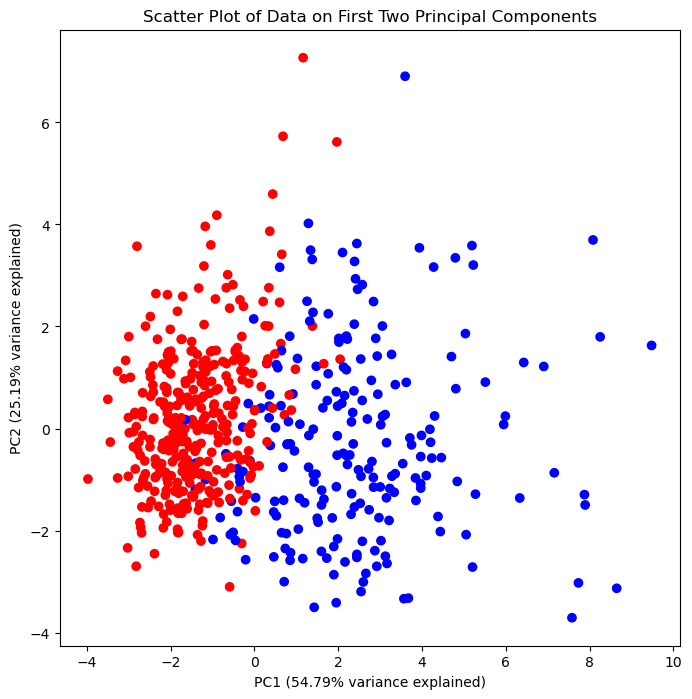

In [28]:
# Create Scatter Plot
fig, ax = plt.subplots(figsize=(8, 8))

#factorization M=0 B=1 
colors = np.where(y_cancer_array == 1, 'red', 'blue').tolist()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)
plt.xlabel('PC1 ({}% variance explained)'.format(round(variance_explained[0]*100, 2)))
plt.ylabel('PC2 ({}% variance explained)'.format(round(variance_explained[1]*100, 2)))
plt.title('Scatter Plot of Data on First Two Principal Components')
plt.show()

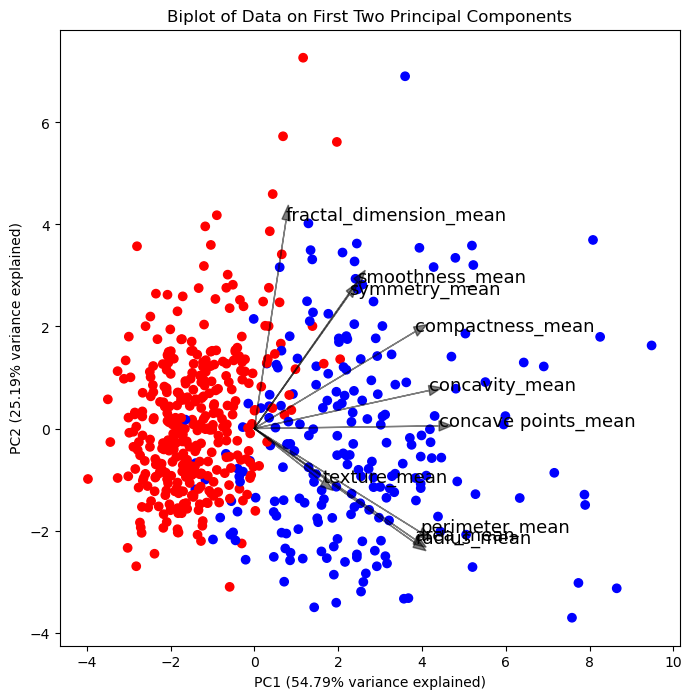

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot observed data
ax.scatter(principal_components[:, 0], principal_components[:, 1], c=np.where(y_cancer_array == 1, 'red', 'blue'))

# Plot variable vectors (loadings)
features = np.array(x_cancer.columns)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Set scaling factor for arrow length
scaling_factor = 4.5

for i, feature in enumerate(features):
    ax.arrow(0, 0, scaling_factor*loadings[i, 0], scaling_factor*loadings[i, 1], color='black', alpha=0.5, head_width=0.2)
    ax.text(scaling_factor*loadings[i, 0], scaling_factor*loadings[i, 1], feature, fontsize=13)

# Set axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

#Set labels and title
ax.set_xlabel('PC1 ({}% variance explained)'.format(round(variance_explained[0]*100, 2)))
ax.set_ylabel('PC2 ({}% variance explained)'.format(round(variance_explained[1]*100, 2)))
ax.set_title('Biplot of Data on First Two Principal Components')

# Show the plot
plt.show()


The proportion of variance Explained by the First Two Principal Components is 0.80. The principle component analysis (PCA) ranks the principle components according to how much variance they explain. A large proportion of Variance explained (such as 0.8) suggests that we can significantly decrease the dimensionality of the data by keeping only these two principal components. We also can see in the scatter plot PCA can differentiate between classes quite well, even though there is some overlapping in the data. The plot also shows red data points that the Benign tumour has a relatively more minor PC1 score than the other class, Malignant.  

Then, the loading scores show each feature's weight or contribution to the relevant principal component. When examining the values, a more excellent loading score (either positive or negative) suggests a stronger relationship between the feature and the principal component. Most of the variables have higher values of loading on PCA1: radius_mean, texture_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, and concave_points_mean. That is why most of these features' arrow direction leans towards PCA1, especially if the loading difference is big between PCA1 and PCA2. However, fractal_dimension_mean has a loading score of PCA2 much bigger than PCA 1, resulting in the arrow direction direct upwards since the PCA2 loading score has a positive value. 

The arrows' length represents each variable's relative importance or contribution to the principal components. Variables with the longest arrow are radius_mean, area_mean, perimeter_mean, and fractal_dimension_mean, meaning these variables significantly contribute to the principal components. Meanwhile, texture_mean has the shortest arrow length, which means it is unimportant to the principal component. Next, we can see the relationship between features radius_mean, area_mean, and perimeter_mean has a strong correlation since they point in the same direction. It is the same case as smoothness_mean and symmetry_mean. 

#### 1.3.5 Comparison of PCA and Feature Importance

In [30]:
# Create table header

Loadings_df= pd.DataFrame(loadings, columns=['Loading PC1','Loading PC2'], index=features)
Loadings_df['Feature']=Loadings_df.index

In [31]:
PCA_featureim = combined_importance_df.merge(Loadings_df, on='Feature')
PCA_featureim

Feature  Coefficient_LR  Importance_DT  Loading PC1  \
0             radius_mean        0.939986       0.016540     0.852597   
1            texture_mean        1.356535       0.074323     0.361832   
2          perimeter_mean        0.850884       0.028169     0.880958   
3               area_mean        1.146472       0.043595     0.852943   
4         smoothness_mean        0.999043       0.005024     0.544632   
5        compactness_mean        0.547468       0.012248     0.853778   
6          concavity_mean        0.943495       0.033293     0.927119   
7     concave points_mean        1.749911       0.773481     0.979338   
8           symmetry_mean        0.439203       0.013326     0.504238   
9  fractal_dimension_mean        0.298966       0.000000     0.168293   

   Loading PC2  
0    -0.498658  
1    -0.233788  
2    -0.452163  
3    -0.484223  
4     0.638494  
5     0.422546  
6     0.165652  
7     0.011411  
8     0.585025  
9     0.908220

Based on the plot in the previous section, the variables that are give more significant effect to the tumor diagnosis are fractal_dimension_mean, area_mean, perimeter_mean, and radius_mean.

Then, we identify both similarities and differences between the two methods, PCA, and feature importance and coefficient. Features with higher loading scores on PC1 or PC2 that frequently show up as important variables include radius_mean, area_mean, and concave points_mean. This suggests both their importance in both models and their impact on accurately capturing the variability. There are certain inconsistencies, though, where features may have different significance scores and loading scores, indicating that the two analytical methodologies do not view those as being relevant in the same way. 

Considering both feature importance and PCA loading scores provides a comprehensive understanding of the features' relevance and their contribution to the prediction of tumor status. It helps identify common influential features and highlights any disparities between the two approaches


#### 1.3.6 Evaluation of New Model

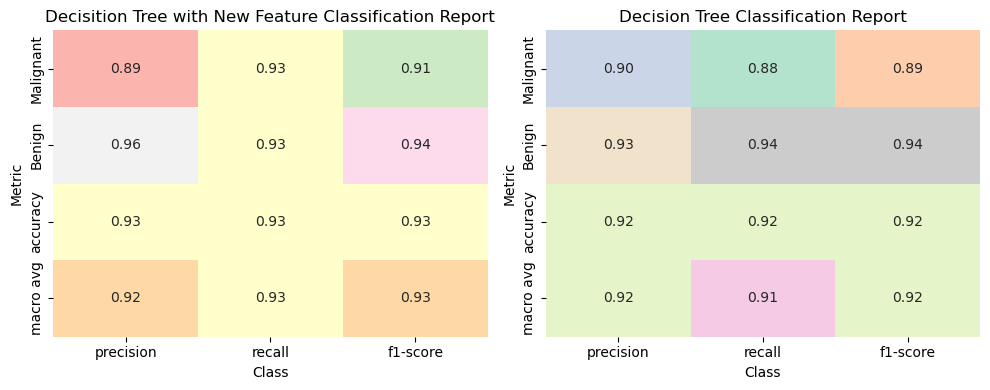

In [32]:
# Define the labels for the classification report
labels = ['Malignant','Benign']

# Generate the classification report for the first model
report1 = classification_report(y_test12, y_pred_nf, target_names=labels, output_dict=True)
df_report1 = pd.DataFrame(report1).transpose()

# Generate the classification report for the second model
report2 = classification_report(y_test11, y_pred_dt, target_names=labels, output_dict=True)
df_report2 = pd.DataFrame(report2).transpose()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the classification report for the first model
sn.heatmap(df_report1.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Pastel1', cbar=False, ax=axes[0])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Metric')
axes[0].set_title('Decisition Tree with New Feature Classification Report')

# Plot the classification report for the second model
sn.heatmap(df_report2.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Pastel2', cbar=False, ax=axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Metric')
axes[1].set_title('Decision Tree Classification Report')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

A new dataset for this model contains 5 features from PCA. This new model with a feature from PCA slightly increases performance, especially in precision and recall for the Malignant class. Other calculation shows the same number, which is 93% for accuracy, recall and f1-score and 92% for precision. This indicates the new feature from PCA improved the model's performance.

The improvement in precision and recall for the Malignant class indicates that the new features captured important information related to the distinguishing characteristics of malignant tumours. By incorporating these features, the model can better differentiate between benign and malignant tumours, making more accurate predictions for the Malignant class.

### 1.4. Conclusions

In conclusion, by considering feature importance, doing PCA analysis, and developing models based on the chosen principal components, we gathered insightful knowledge about the crucial features for predicting tumour status. We saw an increased performance in the models built using the smaller feature space. The recommended model for this task is a decision tree with max_depth=3 and min_samples_split=10 since it performs better than logistic regression.

## Task 2: A Clustering Analysis on Airlines Safety Records

### 2.1 Introduction

The editor-in-chief of FiveThirtyEight, Nate Silver, wrote an essay in 2014 examining how people react to high-profile airline accidents and why they might avoid travelling with particular airlines. The article title is "Should Travellers Avoid Flying Airlines That Have Had Crashes in the Past?".[1] 

Our goal is to investigate the similarity between airlines based on their past safety records. We will use the airline-safety.csv2 dataset provided. This dataset contains several relevant variables, including:
1. airline (asterisk indicates that regional subsidiaries are included)
2. avail seat km per week: available seat kilometres flew every week
3. incidents 85 99: total number of incidents, 1985-1999
4. fatal accidents 85 99: total number of fatal accidents, 1985-1999
5. fatalities 85 99: total number of fatalities, 1985-1999
6. incidents 00 14: total number of incidents, 2000-2014
7. fatal accidents 00 14: total number of fatal accidents, 2000-2014
8. fatalities 00 14: total number of fatalities, 2000-2014

This second task portfolio is divided into several parts: Introduction, Methodology, Results and Discussions, and Conclusions.

*[1] https://fivethirtyeight.com/features/should-travelers-avoid-flying-airlines-that-have-had-crashes-in-the-past/*

### 2.2 Methodology

In this analysis, we will follow several steps of methodology. The first step in data preparation is loading the dataset, looking at its structure, looking for missing values, and verifying for consistency. The dataset will be examined to understand better the variables, their distributions, and any possible connections or patterns between them. In order to analyse the data, this investigation will use visualisations and summary statistics. We will perform K-means clustering, but we will consider the need for data scaling before that. Scaling may be required if the variables have different scales or distributions. To assess the quality of the clusters, we will compute the silhouette score for various values of K (ranging from 2 to 8). Higher scores indicate better-defined clusters. The silhouette score measures how well the data points fit into their allocated clusters. Next, given the established K value, we will perform K-means clustering and analyse the generated groups regarding safety records. We will examine each group's main characteristics and look for noticeable patterns or trends within the clusters. After that, we will perform K-means clustering separately on the data from 1985-1999 and 2000-2014. As a final step, we will calculate the ratios of the variables from 2000 to 2014 divided by the corresponding variables from 1985 to 1999. We will next consider three additional features. On these ratio variables, we will cluster using K-means using the ideal K value. We will present and contrast the outputs of this step with the previous result to understand how the ratio variables affect the clustering results.


#### 2.2.1 Data Preparation and Exploratory Data Analysis (EDA)

In [33]:
# Load the airline-safety.csv dataset
df_airline = pd.read_csv('datasets/airline-safety.csv')

In [34]:
df_airline.head()

airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
1              Aeroflot*              1197672318               76   
2  Aerolineas Argentinas               385803648                6   
3            Aeromexico*               596871813                3   
4             Air Canada              1865253802                2   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
1                     14               128                6   
2                      0                 0                1   
3                      1                64                5   
4                      0                 0                2   

   fatal_accidents_00_14  fatalities_00_14  
0                      0                 0  
1                      1                88  
2                      0                 0  
3                      0                 0  
4                      0                 0

In [35]:
#Checking the NAN value of the data 
Nan_rows= df_airline[df_airline.isnull().any(axis=1)]
Nan_rows.head()

Empty DataFrame
Columns: [airline, avail_seat_km_per_week, incidents_85_99, fatal_accidents_85_99, fatalities_85_99, incidents_00_14, fatal_accidents_00_14, fatalities_00_14]
Index: []

In [36]:
# Preprocess the dataset
df_airline.drop('airline', axis=1, inplace=True)  # Remove the 'airline' column

#### 2.2.2 Scalling Data

In [37]:
from sklearn.preprocessing import MinMaxScaler
# Scale the variables
scaler = MinMaxScaler()
df_airline_scaled = scaler.fit_transform(df_airline)

#### 2.2.3 Silhoutte Score

In [38]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

In [39]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=5508).fit(df_airline_scaled)
                for k in range(1, 9)]

silhouette_scores =[]
silhouette_scores = [silhouette_score(df_airline_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

In [40]:
silhouette_scores

[0.45075634587418023,
 0.3942930858792117,
 0.41904506383728973,
 0.4244639820763271,
 0.3839680177162132,
 0.33421092762578447,
 0.33354499782399494]

In [41]:
#make it to dataframe
silhouette_scores_df = pd.DataFrame(silhouette_scores, columns=['Sillhoutte_Score']) 
silhouette_scores_df['Number of K'] = pd.DataFrame([2,3,4,5,6,7,8])

#### 2.2.4 K-means clustering with the value of K obtained

In [42]:
# Apply K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=5508)
cluster_labels = kmeans.fit_predict(df_airline_scaled)

In [43]:
#make new column for the first cluster
df_airline['1st_cluster'] = cluster_labels

#### 2.2.5 Perform K-means Clustering Separately on The Data from 1985-1999 and 2000-2014

In [44]:
# Select the variables for the two subsets
variables_85_99 = df_airline_scaled[:,1:4]
variables_00_14 = df_airline_scaled[:,4:7]

# Set the random state
random_state = 5508

# Apply K-means clustering with K=2 on variables from 1985-1999
kmeans_85_99 = KMeans(n_clusters=2, random_state=random_state)
cluster_labels_85_99 = kmeans_85_99.fit_predict(variables_85_99)

# Apply K-means clustering with K=2 on variables from 2000-2014
kmeans_00_14 = KMeans(n_clusters=2, random_state=random_state)
cluster_labels_00_14 = kmeans_00_14.fit_predict(variables_00_14)

# Check if the clusters changed
clusters_changed = not all(cluster_labels_85_99 == cluster_labels_00_14)

# Print the result
if clusters_changed:
    print("The clusters changed when considering different time periods.")
else:
    print("The clusters remained the same when considering different time periods.")

# Analyze the resulting clusters
cluster_results = pd.DataFrame({
    'cluster_85_99': cluster_labels_85_99,
    'cluster_00_14': cluster_labels_00_14
})

The clusters changed when considering different time periods.


In [45]:
#assign the cluster label for different time period into the dataset
df_airline['cluster_85_99'] = cluster_labels_85_99
df_airline['cluster_00_14'] = cluster_labels_00_14

#### 2.2.6 Perform K-means Cluster with Three New Features as The Ratio of The Variables from 2000-2014 Divided by The Respective Variables from 1985-1999

In [46]:
epsilon = 1e-8
# Calculate the ratios of variables from 2000-2014 to variables from 1985-1999
ratio_variables = df_airline_scaled[:, 4:7]/(df_airline_scaled[:, 1:4]+epsilon)

# Set the random state
random_state = 5508

# Apply K-means clustering with K from Task 1 on the ratio variables
kmeans_ratio = KMeans(n_clusters=2, random_state=random_state)
cluster_labels_ratio = kmeans_ratio.fit_predict(ratio_variables)

# Assign cluster labels to the original dataset
df_airline['cluster_ratio'] = cluster_labels_ratio

# Analyze the resulting clusters from the ratio variables
cluster_means_ratio = df_airline.groupby('cluster_ratio').mean()

print("Clusters from Scaled Ratio Variables:")
cluster_means_ratio.iloc[:, 0:7]

Clusters from Scaled Ratio Variables:


avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
cluster_ratio                                                                   
0                        1.462775e+09         7.568627               2.392157   
1                        5.874576e+08         3.200000               0.000000   

               fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
cluster_ratio                                                             
0                    123.431373         4.117647               0.607843   
1                      0.000000         4.200000               1.200000   

               fatalities_00_14  
cluster_ratio                    
0                     48.588235  
1                    126.200000

### 2.3 Results and Discussions

#### 2.3.1 Data Preparation and Exploratory Data Analysis

In [47]:
df_airline.describe()

avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
count            5.600000e+01        56.000000              56.000000   
mean             1.384621e+09         7.178571               2.178571   
std              1.465317e+09        11.035656               2.861069   
min              2.593733e+08         0.000000               0.000000   
25%              4.740362e+08         2.000000               0.000000   
50%              8.029089e+08         4.000000               1.000000   
75%              1.847239e+09         8.000000               3.000000   
max              7.139291e+09        76.000000              14.000000   

       fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
count         56.000000        56.000000              56.000000   
mean         112.410714         4.125000               0.660714   
std          146.691114         4.544977               0.858684   
min            0.000000         0.000000               0.000000   
25%            0.000000         1.000000               0.000000   
50%           48.500000         3.000000               0.000000   
75%          184.250000         5.250000               1.000000   
max          535.000000        24.000000               3.000000   

       fatalities_00_14  1st_cluster  cluster_85_99  cluster_00_14  \
count         56.000000    56.000000      56.000000      56.000000   
mean          55.517857     0.750000       0.267857       0.678571   
std          111.332751     0.436931       0.446850       0.471251   
min            0.000000     0.000000       0.000000       0.000000   
25%            0.000000     0.750000       0.000000       0.000000   
50%            0.000000     1.000000       0.000000       1.000000   
75%           83.250000     1.000000       1.000000       1.000000   
max          537.000000     1.000000       1.000000       1.000000   

       cluster_ratio  
count      56.000000  
mean        0.089286  
std         0.287736  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

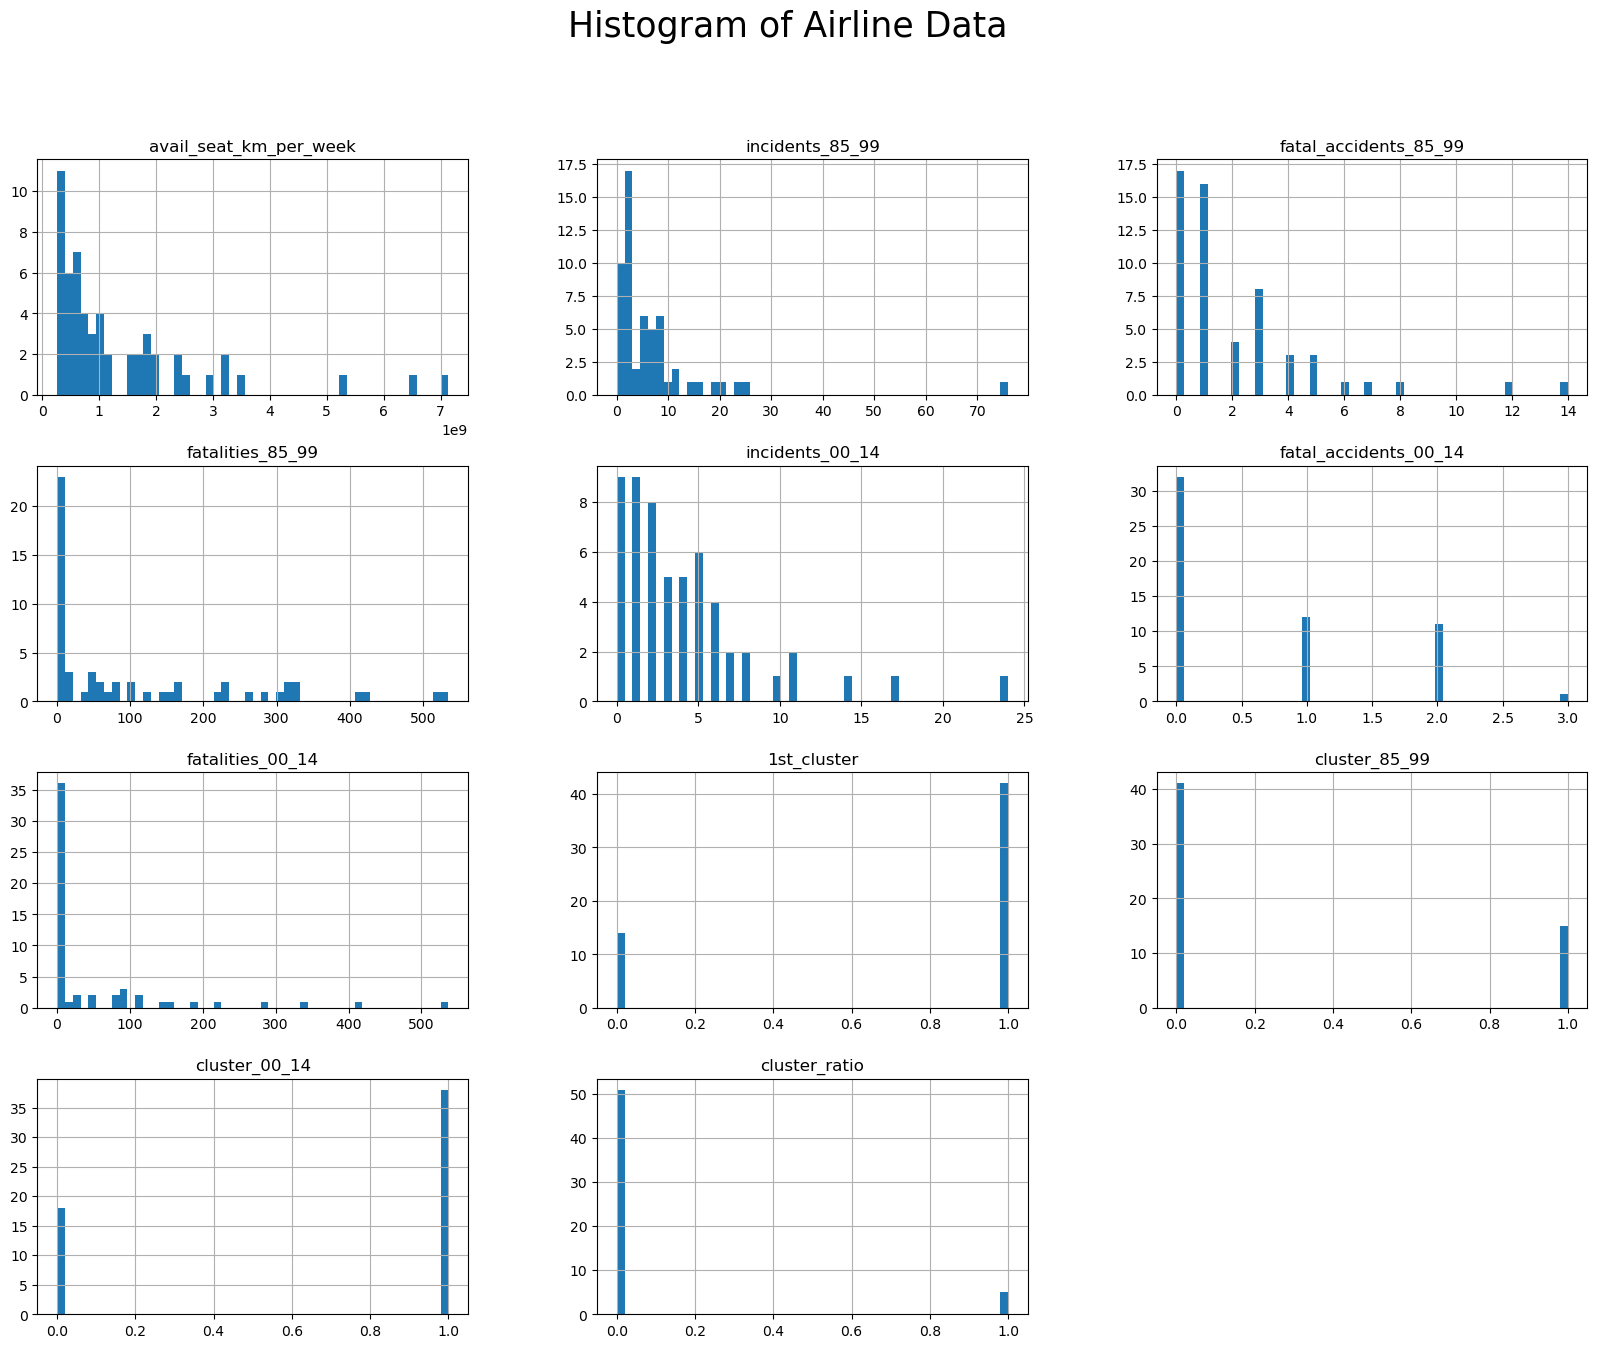

In [48]:
#define for plot the histogram of the data
df_airline.hist(bins=50,figsize=(20,15))

# Add a title to the histogram
plt.suptitle("Histogram of Airline Data", fontsize=25)
# Adjust spacing between subplots
plt.show()

The dataset has 56 observations. With 1.38 billion available seat kilometres per week on average, the airlines in the dataset are in operation. However, the large standard deviation of almost 1.47 billion shows that this metric has a substantial amount of fluctuation. This variable has a wide range of values, from about 259 million to 7.14 billion.

The remaining variables record safety statistics across particular time frames. On average, there were 7.18 incidents, 2.18 fatal accidents, and 112.41 fatalities from 1985-1999. From 2000-2014, the average number of incidents decreased to 4.12, with 0.66 fatal accidents and 55.52 fatalities.

From the histograms, we can see that most of the data has a right-skewed distribution, and the frequency of the data is concentrated in the lower end of each variable. For example, mostly, there is no incident or fatal accident. Even though some airlines may experience some incidents, it is really low compared to the whole dataset. In addition, based on this overview data, it is recommended to do scaling. Further explanation about scaling is in the next section.

#### 2.3.2 Scalling Data and Feature Selection

Decision on Scaling the Data:
Before doing K-means clustering, it is suggested to scale the data, especially when the variables have various scales or units. By bringing the variables to a close range, scaling guarantees that each variable contributes equally to the clustering process. If the variables in the dataset have different units, magnitudes, or scales, not scaling the data could result in one variable dominating the clustering process simply because of its larger values.

Because data distributions are skewed, we will use MinMaxScaler for scaling the data. Based on the lowest and maximum values of the variable, the MinMaxScaler adjusts the data to a given range, often between 0 and 1. This scaling method might be useful for skewed distributions since it maintains close connections between the data points. 

Decision on Using All Variables in the Analysis:
All factors can be included for a comprehensive examination that covers every aspect of airline safety. It makes it possible to spot trends and connections between various events, fatalities, and accidents. Since we only have seven variables which, half of the variables are divided based on the period for each airline (1985 - 1999, 2000 - 2014), so it is necessary to include all of the variables to have better insights when doing clustering for the airline safety in an extended period, during 1985 - 2014. 

#### 2.3.3 Silhoutte Score

In [49]:
silhouette_scores_df

Sillhoutte_Score  Number of K
0          0.450756            2
1          0.394293            3
2          0.419045            4
3          0.424464            5
4          0.383968            6
5          0.334211            7
6          0.333545            8

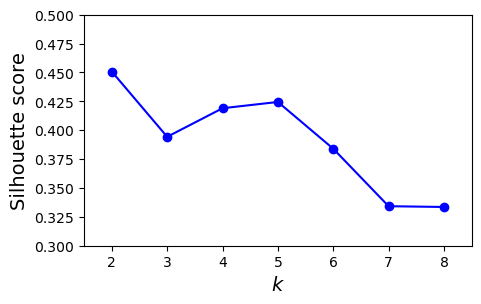

In [50]:
#plot silhoutte score
plt.figure(figsize=(5, 3))
plt.plot(range(2, 9), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.5, 8.5, 0.3, 0.5])  # Adjusted y-axis limits
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.426198528409114
For n_clusters = 3 The average silhouette_score is : 0.3942930858792117
For n_clusters = 4 The average silhouette_score is : 0.41904506383728973
For n_clusters = 5 The average silhouette_score is : 0.42410579124913933
For n_clusters = 6 The average silhouette_score is : 0.4269060717322556


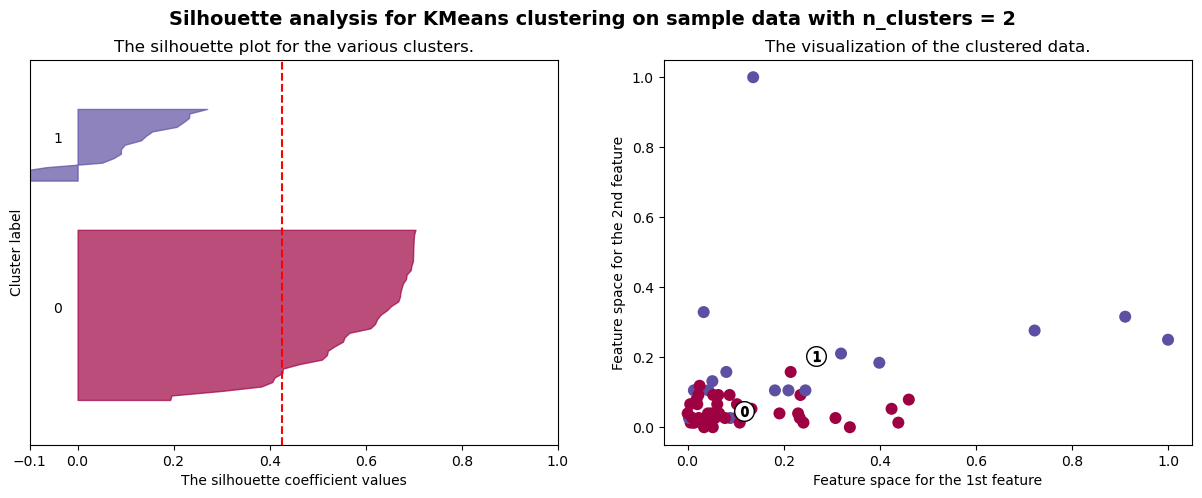

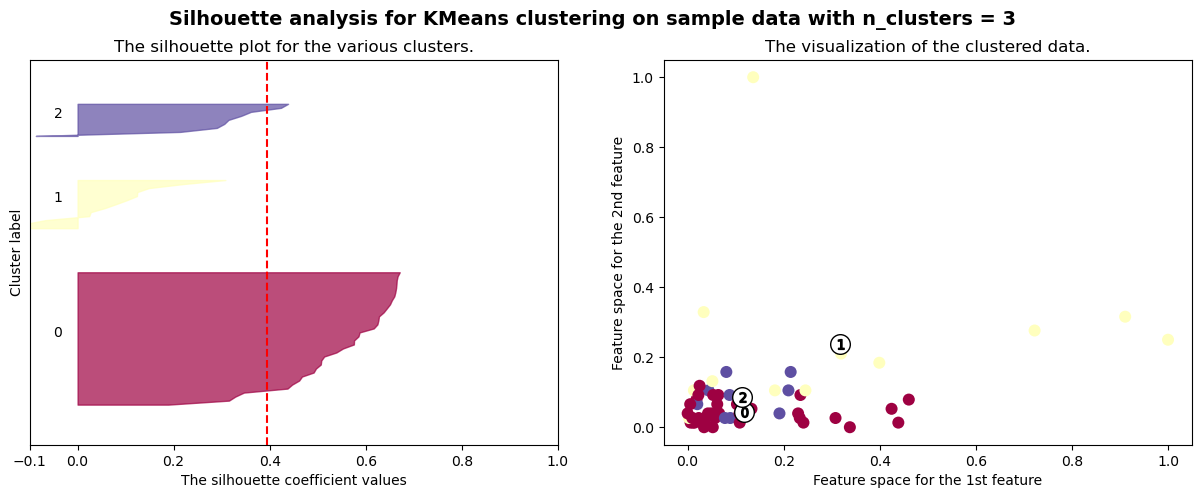

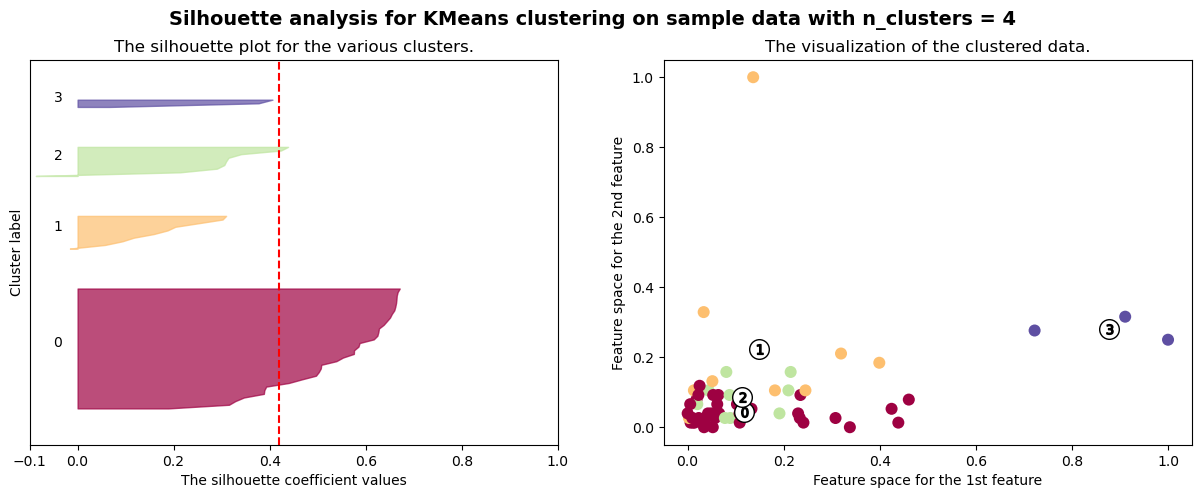

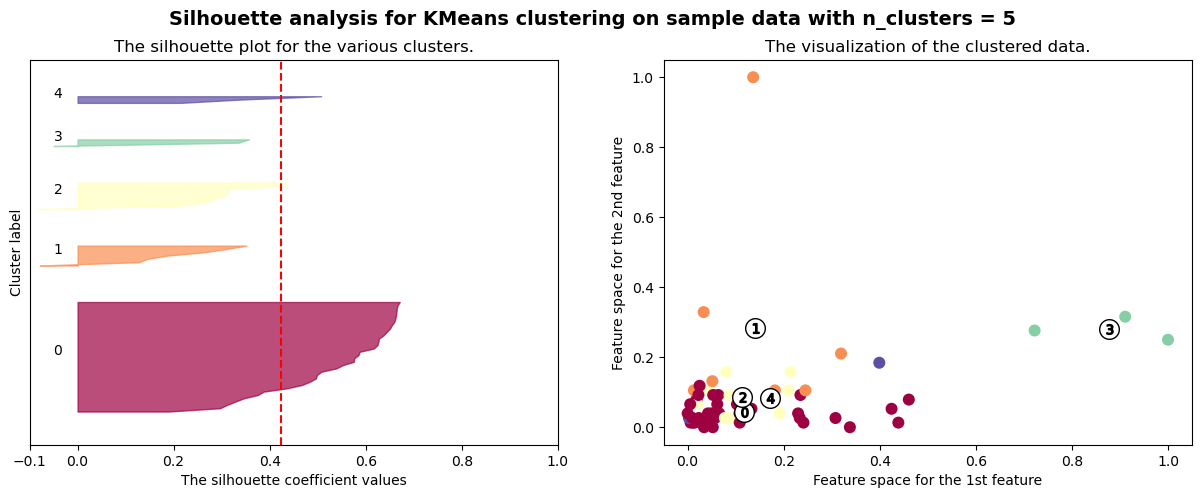

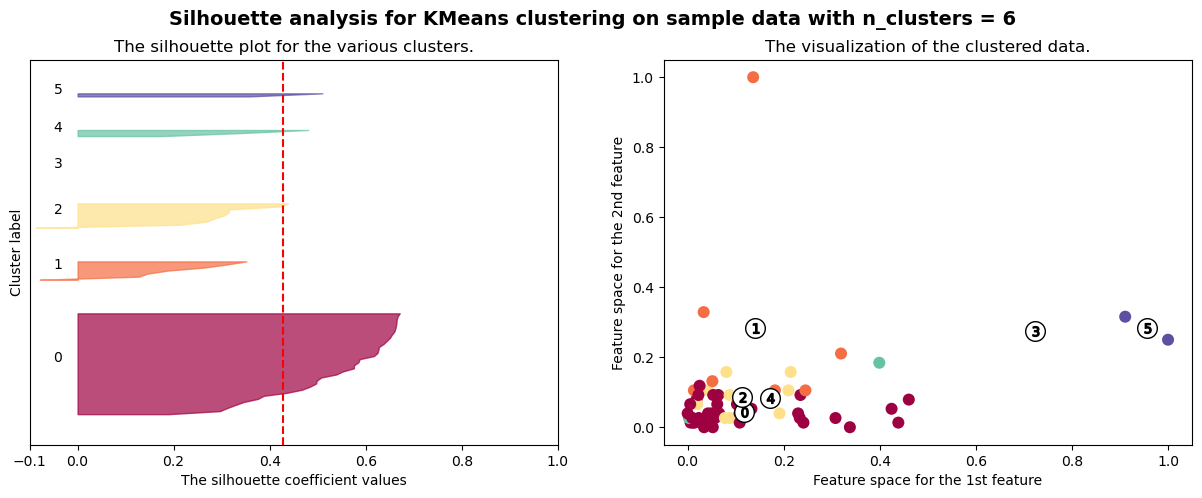

In [51]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_airline_scaled
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = mpl.cm.Spectral(i / (n_clusters-1))
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = mpl.cm.Spectral(cluster_labels.astype(float) / (n_clusters-1))
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=300, lw=0, alpha=1, c=colors, edgecolor="k",
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The resulting plot will display the silhouette score for each value of K. Higher silhouette scores indicate better-defined and more distinct clusters. Therefore, we are interested in choosing a value of K that maximizes the silhouette score. Analyzing the line plot shows that the highest Silhouette Score is at K =2. However, when we see the silhouette plot, the cluster 2 does not look good, as the spread of the data points in the scatter plot is too broad, so it is not easy to make a cluster with this kind of data with only 56 points data. However, as we see other silhouette plots, the clustering for other numbers could be better, especially how the model clustered the data in the scatter plot. Therefore, 2 cluster makes more sense to have for this dataset.

#### 2.3.4 K-means clustering with the value of K obtained

In [52]:
print("Clusters for K=2:")
cluster_means = df_airline.groupby('1st_cluster').mean()
cluster_means

Clusters for K=2:


avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
1st_cluster                                                                   
0                      2.327589e+09        17.571429               5.285714   
1                      1.070299e+09         3.714286               1.142857   

             fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
1st_cluster                                                             
0                  189.285714         8.500000               1.928571   
1                   86.785714         2.666667               0.238095   

             fatalities_00_14  cluster_85_99  cluster_00_14  cluster_ratio  
1st_cluster                                                                 
0                  178.642857       0.571429       0.000000       0.071429  
1                   14.476190       0.166667       0.904762       0.095238

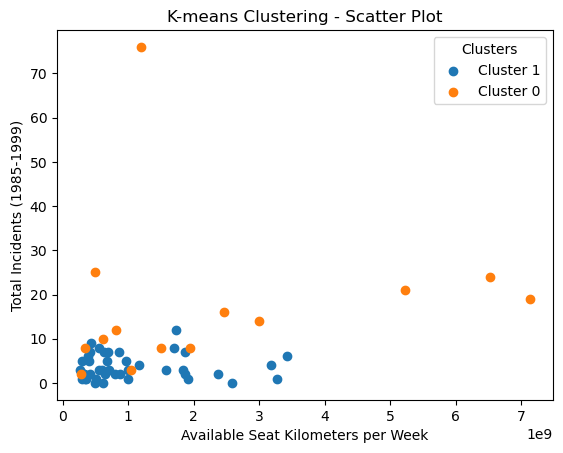

In [53]:
# Get unique cluster labels
clusters = df_airline['1st_cluster'].unique()

# Create scatter plots for each cluster
for cluster in clusters:
    data = df_airline[df_airline['1st_cluster'] == cluster]
    plt.scatter(data['avail_seat_km_per_week'], data['incidents_85_99'], label=f'Cluster {cluster}')

# Set plot labels and title
plt.xlabel('Available Seat Kilometers per Week')
plt.ylabel('Total Incidents (1985-1999)')
plt.title('K-means Clustering - Scatter Plot')

# Add legend with all clusters
plt.legend(title='Clusters', loc='upper right')

# Show plot
plt.show()

We then see the average of each variable in the dataset grouped by 2 clusters, 0 and 1. Airlines in Cluster 0 have a greater capacity and a record of more incidents, fatal accidents, and fatalities between 2000 and 2014, as well as between 1985 and 1999. On the other hand, the airlines in Cluster 1 have a smaller total capacity and experience fewer incidents, fatal accidents, and fatalities throughout both periods—cluster 0 indicating a more significant risk profile and Cluster 1 suggesting a somewhat safer group.

The scatter plot between the first and second features shows how the dataset's data points are distributed. The first characteristic is represented by the x-axis (avail_seat_km_per_week), and the second feature is represented by the y-axis (incidents_85_99). On the graphic, every data point appears as a dot. Since Cluster 1's dots are mostly located in the lower portion of the first feature, fewer seats are available every week. Furthermore, these dots span a smaller range of incidents_85_99. Cluster 0, on the other hand, is primarily seen in the higher range of the first feature, indicating a larger weekly seat capacity. These dots often have incidents_85_99 values that are high compare to cluster 1.

#### 2.3.5 Perform K-means Clustering Separately on The Data from 1985-1999 and 2000-2014

In [54]:
print("\nCluster Results:")
cluster_results.head()


Cluster Results:


cluster_85_99  cluster_00_14
0              0              1
1              1              0
2              0              1
3              0              1
4              0              1

We can see that the clusters have changed by comparing the cluster allocations for the two time periods. Some airlines formerly categorized into Cluster 0 between 1985 and 1999 have been moved to Cluster 1 between 2000 and 2014, and vice versa.

These modifications in cluster assignments suggest that trends or features in aircraft safety records have changed between the two time periods. It implies that there have been changes or differences over time in how well airlines safety.

The change in cluster assignments suggests that the safety records of airlines have shifted over time. Factors such as changes in safety regulations, improvements in safety practices, or shifts in incident rates could contribute to these changes. It highlights the importance of considering the specific period when evaluating the safety performance of airlines. The change in cluster labels increases the possibility that airlines' safety records have changed over time. These changes may be influenced by modifications to safety laws, advancements in safety procedures, or variations in occurrence rates. It illustrates the importance of considering the specific period when assessing an airline's safety record.

#### 2.3.6 Perform K-means Cluster with Three Ratio Variables and Compare with The Result of Previous Clusters

In [55]:
cluster_means

avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
1st_cluster                                                                   
0                      2.327589e+09        17.571429               5.285714   
1                      1.070299e+09         3.714286               1.142857   

             fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
1st_cluster                                                             
0                  189.285714         8.500000               1.928571   
1                   86.785714         2.666667               0.238095   

             fatalities_00_14  cluster_85_99  cluster_00_14  cluster_ratio  
1st_cluster                                                                 
0                  178.642857       0.571429       0.000000       0.071429  
1                   14.476190       0.166667       0.904762       0.095238

In [56]:
print("Clusters 1985-1999:")
# Analyze the resulting clusters from the ratio variables
cluster_means_85_99 = df_airline.groupby('cluster_85_99').mean()
cluster_means_85_99.iloc[:, 0:7]

Clusters 1985-1999:


avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
cluster_85_99                                                                   
0                        1.225895e+09         4.073171               1.097561   
1                        1.818473e+09        15.666667               5.133333   

               fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
cluster_85_99                                                             
0                     37.097561         3.243902               0.487805   
1                    318.266667         6.533333               1.133333   

               fatalities_00_14  
cluster_85_99                    
0                     55.609756  
1                     55.266667

In [57]:
print("Clusters 2000-2014:")
# Analyze the resulting clusters from the ratio variables
cluster_means_00_14 = df_airline.groupby('cluster_00_14').mean()
cluster_means_00_14.iloc[:, 0:7]

Clusters 2000-2014:


avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
cluster_00_14                                                                   
0                        1.966956e+09        14.388889               4.166667   
1                        1.108779e+09         3.763158               1.236842   

               fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
cluster_00_14                                                             
0                    165.500000         7.611111               1.722222   
1                     87.263158         2.473684               0.157895   

               fatalities_00_14  
cluster_00_14                    
0                    166.666667  
1                      2.868421

In [58]:
print("Clusters from Scaled Ratio Variables:")
cluster_means_ratio.iloc[:, 0:7]

Clusters from Scaled Ratio Variables:


avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
cluster_ratio                                                                   
0                        1.462775e+09         7.568627               2.392157   
1                        5.874576e+08         3.200000               0.000000   

               fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
cluster_ratio                                                             
0                    123.431373         4.117647               0.607843   
1                      0.000000         4.200000               1.200000   

               fatalities_00_14  
cluster_ratio                    
0                     48.588235  
1                    126.200000

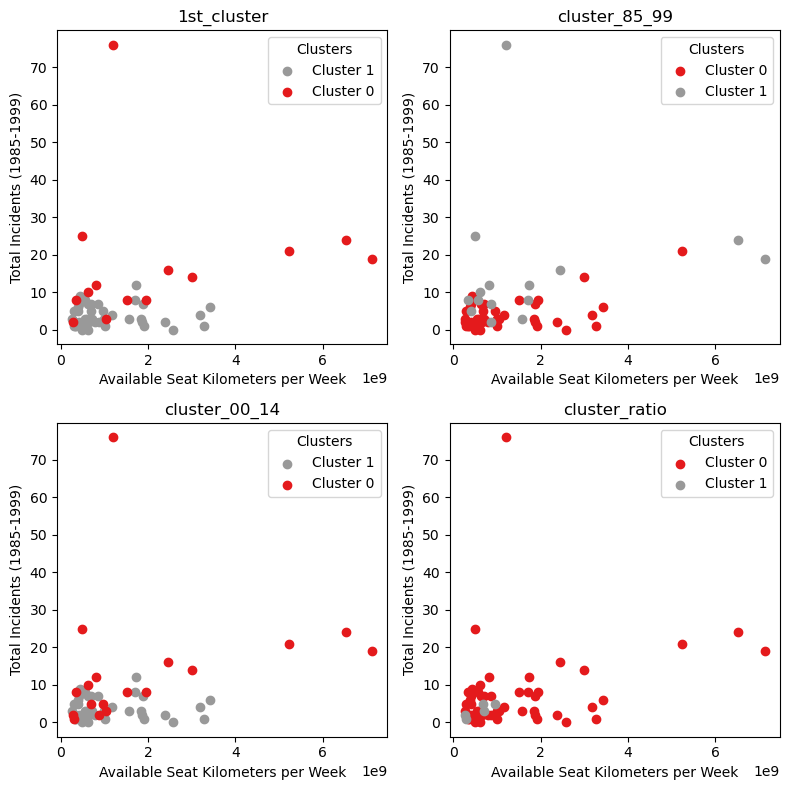

In [59]:
# Define the columns for the scatter plots
columns = ['1st_cluster', 'cluster_85_99', 'cluster_00_14', 'cluster_ratio']

# Create a 2x2 grid for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Iterate over the columns and plot the scatter plots
for col, ax in zip(columns, axes.flatten()):
    cluster_labels = df_airline[col]
    clusters = cluster_labels.unique()
    colors = mpl.cm.get_cmap('Set1', len(clusters))

    for cluster in clusters:
        data = df_airline[cluster_labels == cluster]
        ax.scatter(data['avail_seat_km_per_week'], data['incidents_85_99'], label=f'Cluster {cluster}', color=colors(cluster))

    ax.set_xlabel('Available Seat Kilometers per Week')
    ax.set_ylabel('Total Incidents (1985-1999)')
    ax.set_title(col)
    ax.legend(title='Clusters')

plt.tight_layout()
plt.show()


For the first clustering, which uses all the variables from the data, grouping 0 indicates airlines with more activity and incidents across all variables than Cluster 1, which is the second grouping. As a result of this divergence, Cluster 0 includes airlines with higher levels of incidents and activity, whereas Cluster 1 includes airlines with lower incidents and activity.

Meanwhile, in the clusters based on the periods 1985–1999, Cluster 0 refers to airlines with lower values for all variables, which indicates a comparatively lower occurrence of accidents and deaths. A greater incidence of accidents and deaths occurred during that time, as shown by Cluster 1, which comprises airlines with higher values for all variables.

However, Cluster 0 includes airlines with higher values for all variables between 2000 and 2014, similar to the first cluster, indicating a higher frequency of accidents and deaths. On the other hand, airlines in Cluster 1 have lower values for all variables, suggesting that accidents and deaths were less common during that time.

When comparing the clusters generated by the scaled ratio variables, Cluster 0 appears as a group of airlines with higher values for metrics like "avail_seat_km_per_week," "incidents_85_99," "fatal_accidents_85_99," and "fatalities_85_99." These airlines have a comparatively more significant amount of activity and incidents, as well as intermediate values for "incidents_00_14," "fatal_accidents_00_14," and "fatalities_00_14." A lower level of activity and incidents are indicated by Cluster 1, which consists of airlines with lower values for all variables except for a significantly greater value for "incidents_00_14.".But when we see the scatter plot for the ratio variable, cluster 0 dominates the data grouping. This could indicate that the variables used for clustering are more strongly correlated within Cluster 0, leading to a distinct separation between the clusters.

### 2.4 Conclusions

In conclusion, the study showed that the clustering of airlines changed depending on various factors and times. Groups were created based on the number of available seat kilometres, incident rates, fatal accidents, and fatalities. The findings highlighted the need to thoroughly consider certain factors and periods for airline clustering and safety records.It is significant to note that more investigation and verification are advised to guarantee the stability and dependability of the clusters.

## Task 3: A Clustering Analysis on The USArrests Data

### 3.1 Introduction

This analysis will explore the USArrests dataset, which provides a historical snapshot of crime rates in the United States in 1973. The dataset includes information on three crime-related statistics, specifically the arrest rates for murder, assault, and rape. These rates are given in terms of arrests per 100,000 residents in each of the 50 US states.
The provided USArrests.csv data set contains 50 observations on four variables:

- Murder: murder arrests (per 100,000)
- Assault: assault arrests (per 100,000)
- Rape: rape arrests (per 100,000)
- UrbanPop: percent of the population living in urban areas

This analysis aims to uncover patterns and structures in the USArrests data through hierarchical clustering and Principal Component Analysis (PCA).
The subsequent sections of this portfolio will be covered in methodology, results and discussions, and conclusions.

### 3.2 Methodology

The methodology for this analysis involves a four-step process. The first involves conducting a hierarchical clustering on the raw data, employing complete linkage and Euclidean distance, and cutting the resulting dendrogram to yield three distinct clusters. These clusters are then analyzed to determine state groupings and their characteristics. Then, we repeat the first step but scale the variables to have zero mean and unit standard deviation, investigating the impact of scaling on the clusters and evaluating whether scaling is advantageous in this context. The third step performs Principal Component Analysis (PCA) of the dataset. Then hierarchical clustering is applied on the first two principal component score vectors instead of the raw data, aiming again to form three distinct clusters. A scatterplot of the first two principal components is produced and colour-coded by cluster, and the resultant groups are compared to those obtained in Task 2. Finally, Task 4 adopts the K-means clustering algorithm (with K=3) using the first two principal component score vectors as features and sets the initial centroids as the group means from Task 3. The K-means algorithm utilizes the Euclidean distance and a fixed random state for reproducibility. The K-means and hierarchical clustering outcomes are then compared, and a decision is made on which method provides the most insightful result.

#### 3.2.1 Data Preprocessing and Exploratory Data Analysis

In [60]:
# Load the dataset
df_USA = pd.read_csv("datasets/USArrests.csv")

In [61]:
df_USA.head()

State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

#### 3.2.2 Hierarchical Clustering in 3 Distinct Cluster for Raw Data 

In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linked_raw = linkage(df_USA.iloc[:, 1:], method='complete', metric='euclidean')

# Find the distance threshold that results in exactly 3 clusters
n_clusters = 3
thresholds = np.arange(100, 300, 5)
for t1 in thresholds:
    clusters = fcluster(linked_raw, t=t1, criterion='distance')
    if len(np.unique(clusters)) == n_clusters:
        break

In [63]:
clusters1 = fcluster(linked_raw, t=t1, criterion='distance')
df_USA['Raw_Cluster'] = clusters1

#### 3.2.3 Hierarchical Clustering in 3 Distinct Cluster for Scaled Data

In [64]:
scaler = StandardScaler()
scaled_df_USA = scaler.fit_transform(df_USA.iloc[:, 1:5])
scaled_df_USA = pd.DataFrame(scaled_df_USA, columns=df_USA.columns[1:5])

In [65]:
linked_scaled = linkage(scaled_df_USA.iloc[:, 1:], method='complete', metric='euclidean')

# Find the distance threshold that results in exactly 3 clusters
n_clusters = 3
thresholds = np.arange(1, 5, 0.05)
for t2 in thresholds:
    clusters = fcluster(linked_scaled, t=t2, criterion='distance')
    if len(np.unique(clusters)) == n_clusters:
        break

In [66]:
clusters_scaled = fcluster(linked_scaled, t=t2, criterion='distance')
df_USA['Scaled_Cluster'] = clusters_scaled

#### 3.2.4 Hierarchical Clustering in 3 Distinct Cluster after Performed PCA

In [67]:
#perform PCA on the scaled data
pca3 = PCA(n_components=2)
pca_scores3 = pca3.fit_transform(scaled_df_USA)

In [68]:
#perform hierarchical clustering with complete linkage and Euclidean distance on the first two principal component score vectors
linked_pca = linkage(pca_scores3, method='complete', metric='euclidean')

In [69]:
#Find the distance threshold that results in exactly 3 clusters
n_clusters = 3
thresholds = np.arange(1, 5, 0.2)
for t3 in thresholds:
    clusters = fcluster(linked_pca, t=t3, criterion='distance')
    if len(np.unique(clusters)) == n_clusters:
        break

In [70]:
#Cut the dendrogram at the optimal height that results in three distinct clusters
clusters_PCA = fcluster(linked_pca, t=t3, criterion='distance')
#Add the cluster labels back to the original dataset
df_USA['PCA_Cluster'] = clusters_PCA

In [71]:
pca_df=pd.DataFrame(pca_scores3, columns=['PC1','PC2'])

In [72]:
pca_df['cluster']=clusters_PCA

In [73]:
# Count the number of data points in each cluster
cluster_counts_pca = df_USA['PCA_Cluster'].value_counts()

# Calculate the percentages
cluster_percentages_pca = cluster_counts_pca / len(df_USA) * 100
cluster_percentages_pca

1    62.0
3    22.0
2    16.0
Name: PCA_Cluster, dtype: float64

In [74]:
# Count the number of data points in each cluster
cluster_counts_scaled = df_USA['Scaled_Cluster'].value_counts()

# Calculate the percentages
cluster_percentages_scaled = cluster_counts_scaled / len(df_USA) * 100
cluster_percentages_scaled

3    56.0
1    30.0
2    14.0
Name: Scaled_Cluster, dtype: float64

#### 3.2.4 K-Means in 3 Distinct Cluster after Performed PCA

In [75]:
# initial centroids from hierarchical clustering
initial_centroids = pca_df.groupby('cluster').mean()

kmeans = KMeans(n_clusters=3, init=initial_centroids, random_state=5508)

# assuming pca_scores contains the first two principal component score vectors
kmeans.fit(pca_df[['PC1','PC2']])

KMeans(init=              PC1       PC2
cluster                    
1       -1.049605 -0.201834
2        1.322518  1.471507
3        1.996146 -0.501383,
       n_clusters=3, random_state=5508)

In [76]:
pca_df['kmeans_cluster']=kmeans.labels_+1

### 3.3 Results and Discussions

#### 3.3.1 Data Preprocessing and Exploratory Data Analysis

In [77]:
df_USA.describe()

Murder     Assault   UrbanPop       Rape  Raw_Cluster  \
count  50.00000   50.000000  50.000000  50.000000    50.000000   
mean    7.78800  170.760000  65.540000  21.232000     2.080000   
std     4.35551   83.337661  14.474763   9.366385     0.853325   
min     0.80000   45.000000  32.000000   7.300000     1.000000   
25%     4.07500  109.000000  54.500000  15.075000     1.000000   
50%     7.25000  159.000000  66.000000  20.100000     2.000000   
75%    11.25000  249.000000  77.750000  26.175000     3.000000   
max    17.40000  337.000000  91.000000  46.000000     3.000000   

       Scaled_Cluster  PCA_Cluster  
count       50.000000    50.000000  
mean         2.260000     1.600000  
std          0.899206     0.832993  
min          1.000000     1.000000  
25%          1.000000     1.000000  
50%          3.000000     1.000000  
75%          3.000000     2.000000  
max          3.000000     3.000000

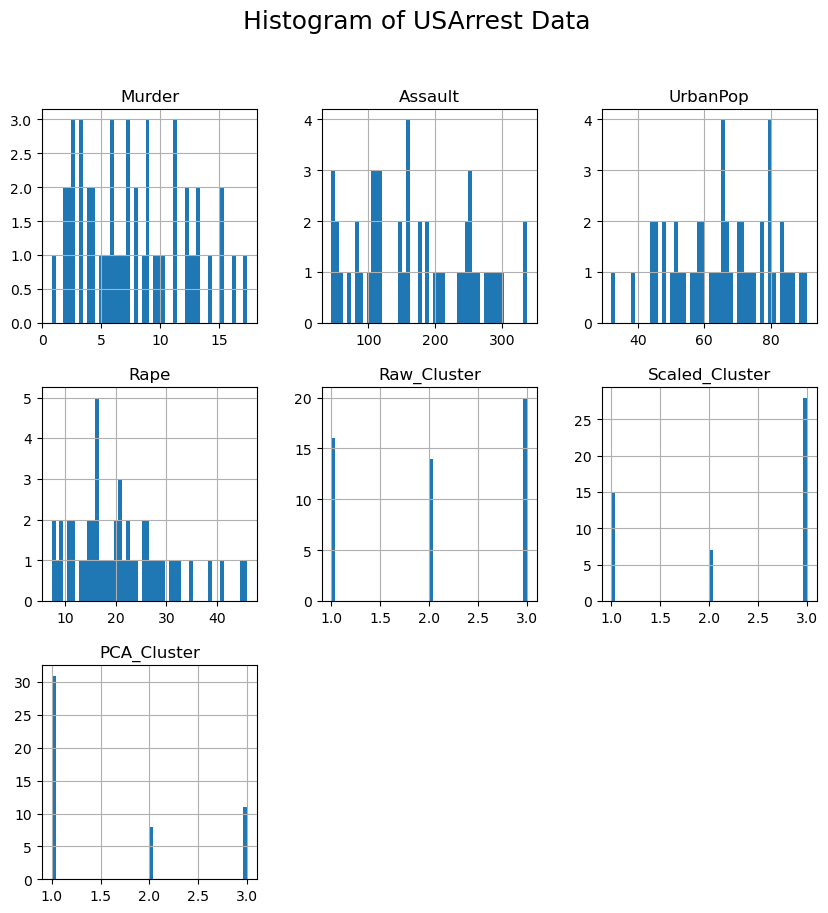

In [78]:
#define for plot the histogram of the data
df_USA.hist(bins=50,figsize=(10,10))

# Add a title to the histogram
plt.suptitle("Histogram of USArrest Data", fontsize=18)
# Adjust spacing between subplots
plt.show()

Fifty observations are shown in the USArrests data for four variables: Rape, Assault, UrbanPop, and Murder. Rape is reported at a rate of 21.236, Murder at 7.788, Assault at 170.76, and UrbanPop at 65.54. Particularly in assault rates, which had the largest standard deviation at 83.34, the statistics show tremendous heterogeneity. The murder rate varies between 0.8 and 17.4, with the statistics falling between low and high extremes. The distribution can be understood better by looking at median rates, which show that half of the states have murder rates below 7.25. These figures give a general picture of the US's urban population distribution and crime rates. From histograms, the variables have a positive skew, given that a few states with extremely high crime rates pull the distribution to the right. Conversely, the UrbanPop variable might be more symmetrical if urban populations are evenly distributed across states. 

#### 3.3.2 Hierarchical Clustering in 3 Distinct Cluster for Raw Data 

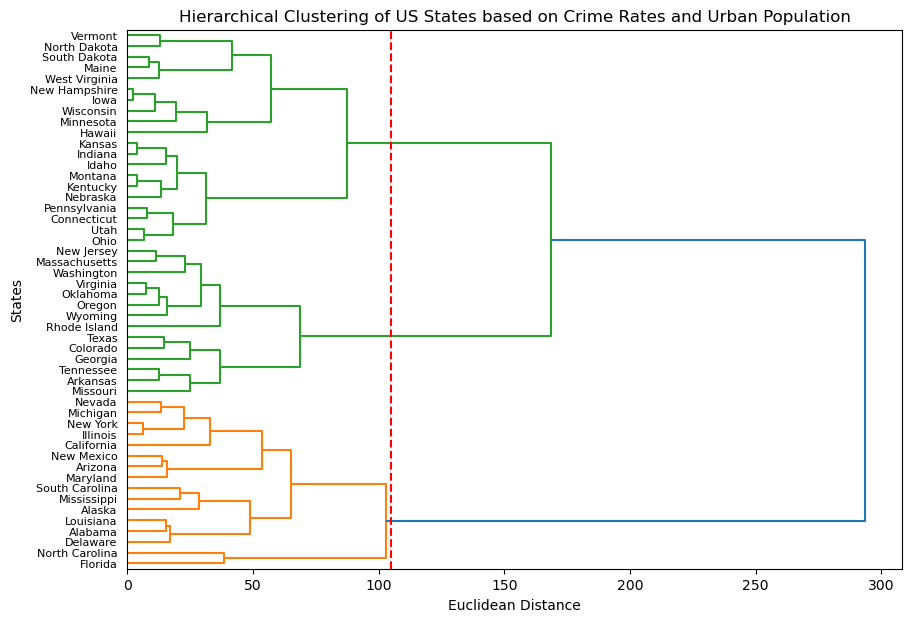

In [79]:
# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_raw, labels=df_USA['State'].values, orientation='right')
plt.axvline(x=t1, color='r', linestyle='--')  # Cut at the optimal height to obtain 3 clusters
plt.xlabel("Euclidean Distance")
plt.ylabel("States")
plt.title("Hierarchical Clustering of US States based on Crime Rates and Urban Population")
plt.show()

In [80]:
print("Each cluster mean:")
#mean of each variable in the same cluster
df_USA.groupby('Raw_Cluster').mean()

Each cluster mean:


Murder     Assault   UrbanPop       Rape  Scaled_Cluster  \
Raw_Cluster                                                                
1            11.812500  272.562500  68.312500  28.375000        1.375000   
2             8.214286  173.285714  70.642857  22.842857        2.714286   
3             4.270000   87.550000  59.750000  14.390000        2.650000   

             PCA_Cluster  
Raw_Cluster               
1               2.500000  
2               1.428571  
3               1.000000


Based on the variables Murder, Assault, UrbanPop, and Rape, three clusters have been found. Cluster 1 states had average murder rates of 11.81, assault rates of 272.56, a percentage of the population (UrbanPop) residing in urban areas of 68.31, and rape rates of 28.38. With an average murder rate of 8.21, an assault rate of 173.28, an UrbanPop of 70.64, and a rape rate of 22.84, Cluster 2 has relatively high crime rates. Finally, Cluster 3, which appears to have the lowest crime rates, exhibits average murder rates of 4.27, assault rates of 87.55, UrbanPop of 59.75, and rape rates of 14.39. This indicates that states within each cluster share similar crime rates and population distributions.

#### 3.3.3 Hierarchical Clustering in 3 Distinct Cluster for Scaled Data

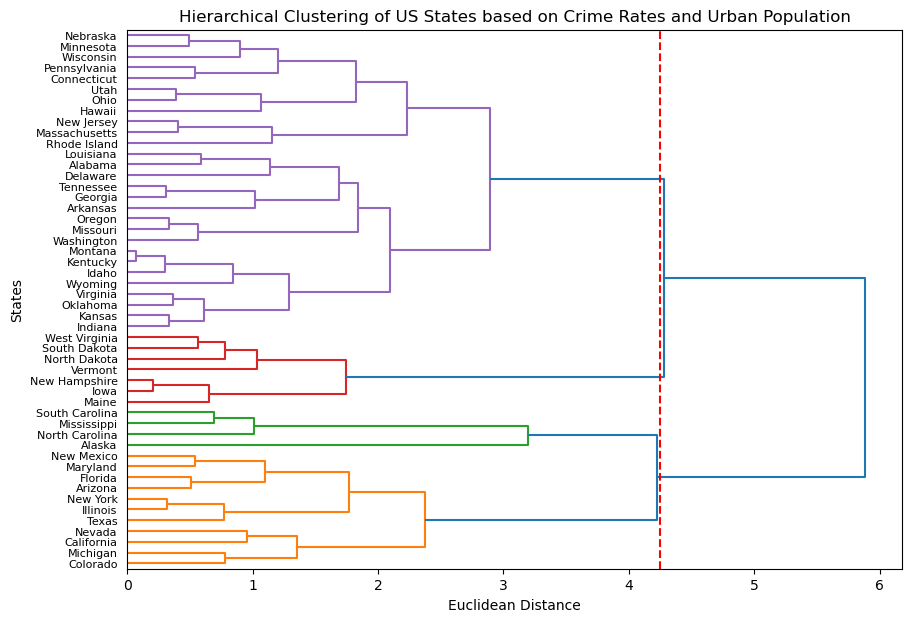

In [81]:
# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_scaled, labels=df_USA['State'].values, orientation='right')
plt.axvline(x=t2, color='r', linestyle='--')  # Cut at the optimal height to obtain 3 clusters
plt.xlabel("Euclidean Distance")
plt.ylabel("States")
plt.title("Hierarchical Clustering of US States based on Crime Rates and Urban Population")
plt.show()

In [82]:
print("Each cluster mean:")
# mean of each variable in the same cluster
scaled_cluster_mean = df_USA.groupby('Scaled_Cluster').mean()
scaled_cluster_mean.iloc[:,:4]

Each cluster mean:


Murder     Assault   UrbanPop       Rape
Scaled_Cluster                                             
1               11.673333  269.533333  70.333333  30.600000
2                2.700000   65.142857  46.285714   9.885714
3                6.978571  144.250000  67.785714  19.050000

We then look at the mean of the raw data and cluster by the scaled data cluster label. Currently, the first cluster consists of states with high crime rates (murder, Assault, and rape) and a sizable metropolitan population. The second cluster consists of the states with the least amount of urban residents and the least amount of crime. The third cluster, which includes the most densely populated cities, comprises states with a moderate crime rate. We can also see from dendogram, some of the members of the group are changing, such as Colorado which previously in cluster 2, after scalling, it is in the cluster 3.

By balancing the influence of each variable on the distance computation, scaling the variables influences the hierarchical clustering and affects the overall structure of the resultant dendrogram. This is crucial when variables are on various scales because unscaled data may produce a clustering solution dominated by the variables with a greater range of values. In this case, the clusters have changed after scaling the variables, indicating that the initial variables were on sufficiently varied scales to influence the clustering process.

Based on this, I think variables should be scaled. A more balanced understanding of the natural groupings in data is made possible by scaling, which prevents variables with bigger scales from predominating in the hierarchical clustering. The variables in this situation (crime rates and the proportion of the population living in cities) indicate different features naturally on different dimensions.

#### 3.3.4 Hierarchical Clustering in 3 Distinct Cluster after Performed PCA and The comparison with Previous Plot

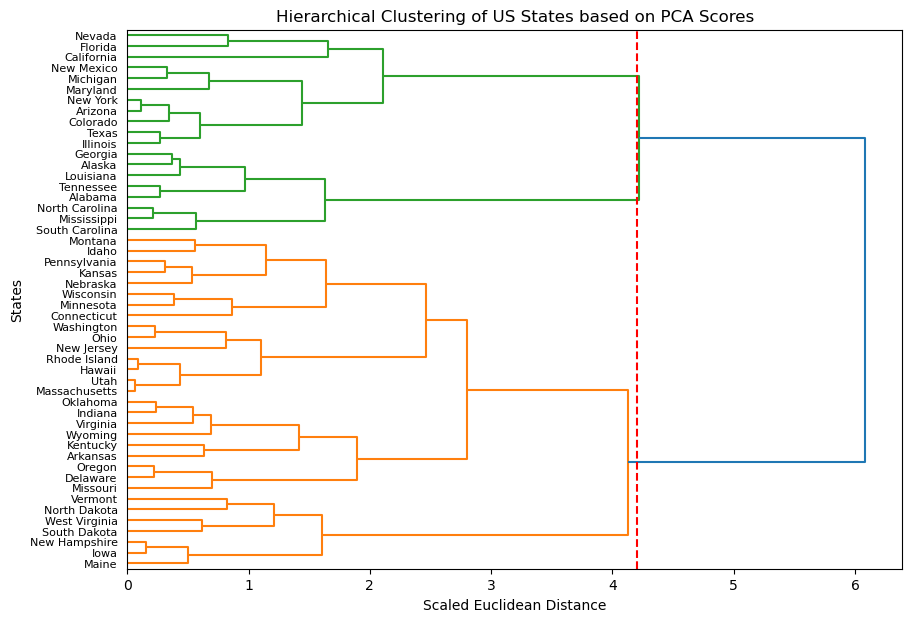

In [83]:
#Create a dendrogram

plt.figure(figsize=(10, 7))
dendrogram(linked_pca, labels=df_USA['State'].values, orientation='right')
plt.axvline(x=t3, color='r', linestyle='--')  # Cut at the optimal height to obtain 3 clusters
plt.xlabel("Scaled Euclidean Distance")
plt.ylabel("States")
plt.title("Hierarchical Clustering of US States based on PCA Scores")
plt.show()

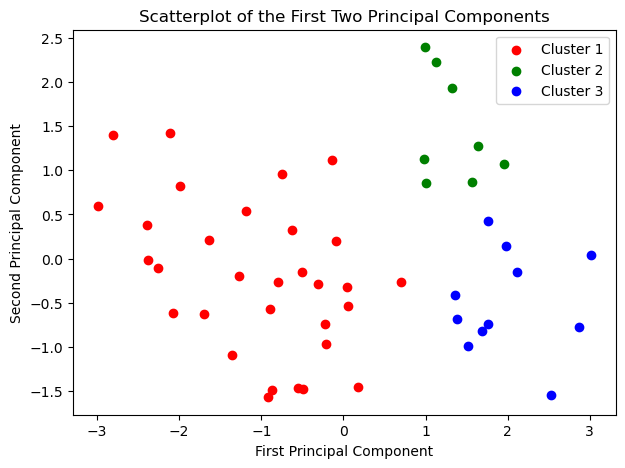

In [84]:
#Create a scatterplot of the first two principal components using different colors for the instances in each cluster

plt.figure(figsize=(7, 5))
colors = ['red', 'green', 'blue']

for i, color in zip(np.unique(clusters_PCA), colors):
    plt.scatter(pca_scores3[clusters == i, 0], pca_scores3[clusters == i, 1],
                c=color, label=f"Cluster {i}")

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.title("Scatterplot of the First Two Principal Components")
plt.show()


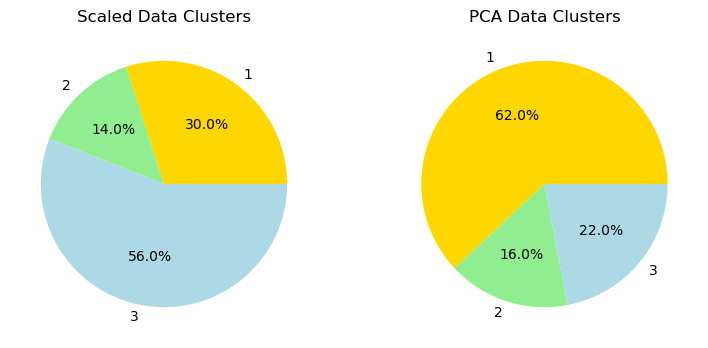

In [85]:
# Combine the cluster percentages into a dataframe
df_cluster_percentages = pd.DataFrame({
    'Scaled_Cluster': cluster_percentages_scaled,
    'PCA_Cluster': cluster_percentages_pca
})

# Plot pie charts
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
colors = ['gold', 'lightgreen', 'lightblue']

ax[0].pie(df_cluster_percentages['Scaled_Cluster'], labels=df_cluster_percentages.index, autopct='%1.1f%%', colors=colors)
ax[0].set_title('Scaled Data Clusters')

ax[1].pie(df_cluster_percentages['PCA_Cluster'], labels=df_cluster_percentages.index, autopct='%1.1f%%', colors=colors)
ax[1].set_title('PCA Data Clusters')

plt.show()

In [86]:
# mean of each variable in the same cluster
pca_cluster_mean = df_USA.groupby('PCA_Cluster').mean()
pca_cluster_mean.iloc[:,:4]

Murder     Assault   UrbanPop       Rape
PCA_Cluster                                             
1             5.003226  116.483871  63.838710  16.338710
2            14.087500  252.750000  53.500000  24.537500
3            11.054545  264.090909  79.090909  32.618182

In [87]:
scaled_cluster_mean.iloc[:,:4]

Murder     Assault   UrbanPop       Rape
Scaled_Cluster                                             
1               11.673333  269.533333  70.333333  30.600000
2                2.700000   65.142857  46.285714   9.885714
3                6.978571  144.250000  67.785714  19.050000

The data points from the same cluster are closer in this scatterplot and further away from data points from other clusters. This shows that the PCA clustering distinct the data quite well.

In PCA clustering, Cluster 3 is the biggest, comprising 62.0% of the data points, followed by Clusters 1 and 2, which include 28.0% and 10.0%. However, when the data is scaled before clustering, Cluster 1 becomes the biggest group, containing 54.0% of the data, followed by Cluster 3, 26.0%, and Cluster 2, 20.0%. These changes show how various data preparation methods, such as scaling and PCA, may dramatically impact clustering results.

States with high crime rates are represented by Cluster 1 in PCA-based grouping, followed by those with medium crime rates and greater urban populations in Cluster 2, and those with low crime rates and fewer urban residents in Cluster 3. In contrast, Cluster 1 for scaled clustering includes states with high crime rates, albeit less than Cluster 1 for PCA-based grouping. States in Cluster 2 have the lowest crime and urban population rates, whereas those in Cluster 3 have middle rates of both crime and urban population. The main distinction is how states with medium and low crime rates are grouped based on PCA clusters for crime and Scaled clusters for urban populations.

The primary distinction between PCA and Scaled clustering is how they categorize states with medium and lower crime rates. PCA clusters differentiate these states predominantly based on crime rates, with Cluster 3 demonstrating the lowest rates. On the other hand, Scaled clusters separate these states primarily based on the urban population percentage, with Cluster 3 showing a higher percentage.

#### 3.3.4 K-Means in 3 Distinct Cluster after Performed PCA and The comparison with Previous Plot

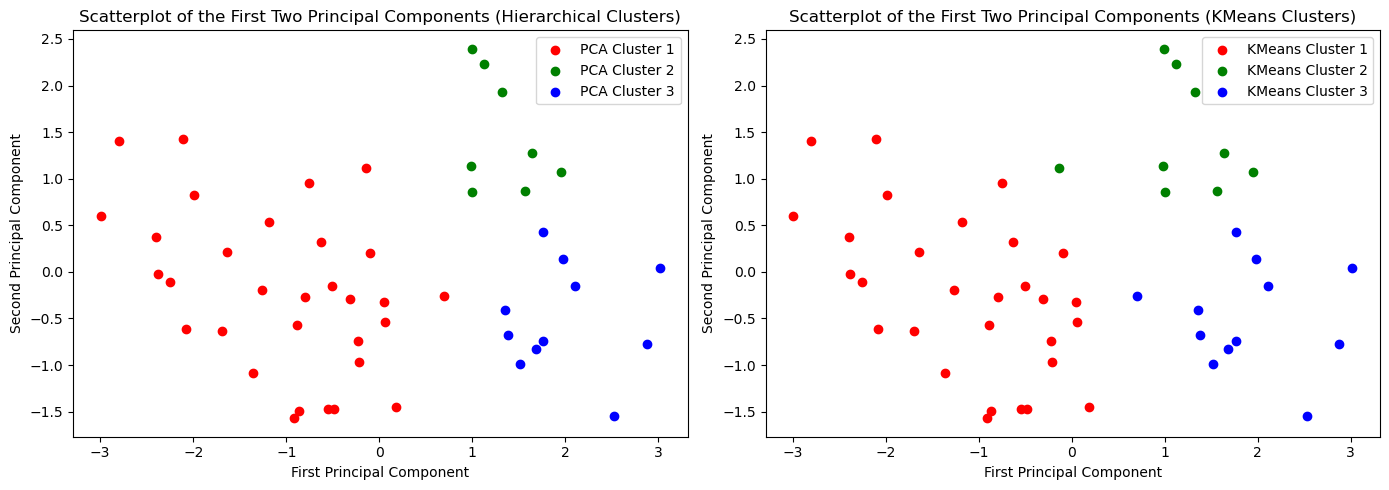

In [88]:
# Assuming that you have run KMeans clustering and the labels are stored in clusters_KMeans

plt.figure(figsize=(14, 5))
colors = ['red', 'green', 'blue']

# Plot for PCA clusters
plt.subplot(1, 2, 1)
for i, color in zip(np.unique(clusters_PCA), colors):
    plt.scatter(pca_scores3[clusters_PCA == i, 0], pca_scores3[clusters_PCA == i, 1],
                c=color, label=f"PCA Cluster {i}")

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.title("Scatterplot of the First Two Principal Components (Hierarchical Clusters)")

# Plot for KMeans clusters
plt.subplot(1, 2, 2)
for i, color in zip(np.unique(kmeans.labels_+1), colors):
    plt.scatter(pca_scores3[kmeans.labels_+1 == i, 0], pca_scores3[kmeans.labels_+1 == i, 1],
                c=color, label=f"KMeans Cluster {i}")

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.title("Scatterplot of the First Two Principal Components (KMeans Clusters)")

plt.tight_layout()
plt.show()


When comparing these two clustering assignments, they are generally consistent but have some differences. For example, both methods assign most of the data points to the same cluster (2). However, a data point is assigned to cluster 1(red) by hierarchical clustering and to cluster 2(green) by K-means. Similarly, another data point is assigned to cluster 1(red) by hierarchical clustering and to cluster 3(blue) by K-means.

These differences could be due to the distinct nature of the two algorithms. Hierarchical clustering is an agglomerative method that successively merges the most similar data points or clusters. At the same time, K-means is an iterative method that tries to partition the data into K clusters in which each data point belongs to the cluster with the nearest mean.

Hierarchicall clustering seems to be better compared to K-means in this kind of dataset, as it can distinct the data better than K-means, from the plot, the one point is more make sense to be clustered in 1 (red) rather than 2 (green) since the data point is closer to cluster 1 than 2.

### 3.4 Conclusions

In our analysis of the USArrests dataset, we applied Principal Component Analysis (PCA) and hierarchical clustering to reveal patterns and groupings within the data. PCA helped reduce the data's dimensionality, making it easier to visualize and interpret. Hierarchical clustering identified similar crime profiles across states. When we used K-means clustering with initial centroids from hierarchical clustering, we saw variations in state groupings compared to the initial hierarchical clustering, showing how different clustering techniques can offer distinct perspectives.

In conclusion, PCA and clustering are powerful tools for uncovering hidden patterns in complex datasets. Hiearchichal clustering is better to perform clustering in this kind of dataset rather than K-Means clustering.